In [ ]:
# let's start the anaylsis.

# LIBRARY IMPORTING AND DF LOADING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
path="astrotrain.csv"
df = pd.read_csv(path)

In [ ]:
df.shape

(40000, 82)

In [ ]:
# print(df.iloc[30000])

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

##PROBLEM STATEMENT 1


In [ ]:
df.describe(include='all')

SUBSURVEY          SNID  \
count                                      40000  4.000000e+04   
unique                                         9           NaN   
top                                                        NaN   
freq                                       39992           NaN   
mean                                         NaN  1.676771e+07   
std                                          NaN  9.683794e+06   
min                                          NaN  2.354000e+03   
25%                                          NaN  8.367022e+06   
50%                                          NaN  1.686448e+07   
75%                                          NaN  2.510454e+07   
max                                          NaN  3.359532e+07   

                    IAUC     FAKE            RA          DECL   PIXSIZE  \
count              40000  40000.0  40000.000000  40000.000000  40000.00   
unique                 1      NaN           NaN           NaN       NaN   
top     NULL                  NaN           NaN           NaN       NaN   
freq               40000      NaN           NaN           NaN       NaN   
mean                 NaN      2.0     39.835341    -19.407487      0.27   
std                  NaN      0.0     14.800212     15.051050      0.00   
min                  NaN      2.0      6.392980    -44.976723      0.27   
25%                  NaN      2.0     35.716156    -28.640380      0.27   
50%                  NaN      2.0     41.157764    -27.204088      0.27   
75%                  NaN      2.0     52.866702     -4.633564      0.27   
max                  NaN      2.0     55.512060      0.978050      0.27   

          NXPIX    NYPIX       CCDNUM  ...  SIM_PEAKMAG_z  SIM_EXPOSURE_g  \
count   40000.0  40000.0  40000.00000  ...   40000.000000         40000.0   
unique      NaN      NaN          NaN  ...            NaN             NaN   
top         NaN      NaN          NaN  ...            NaN             NaN   
freq        NaN      NaN          NaN  ...            NaN             NaN   
mean       -9.0     -9.0     31.58690  ...      22.711626             1.0   
std         0.0      0.0     17.43592  ...       5.092737             0.0   
min        -9.0     -9.0      1.00000  ...      -9.000000             1.0   
25%        -9.0     -9.0     16.00000  ...      22.935463             1.0   
50%        -9.0     -9.0     32.00000  ...      23.490799             1.0   
75%        -9.0     -9.0     47.00000  ...      24.060365             1.0   
max        -9.0     -9.0     62.00000  ...      28.017927             1.0   

        SIM_EXPOSURE_r  SIM_EXPOSURE_i  SIM_EXPOSURE_z  SIM_GALFRAC_g  \
count          40000.0         40000.0         40000.0   4.000000e+04   
unique             NaN             NaN             NaN            NaN   
top                NaN             NaN             NaN            NaN   
freq               NaN             NaN             NaN            NaN   
mean               1.0             1.0             1.0   1.019355e+01   
std                0.0             0.0             0.0   4.586269e+02   
min                1.0             1.0             1.0   1.006474e-32   
25%                1.0             1.0             1.0   6.521853e-14   
50%                1.0             1.0             1.0   5.749799e-01   
75%                1.0             1.0             1.0   2.064853e+00   
max                1.0             1.0             1.0   6.577444e+04   

        SIM_GALFRAC_r  SIM_GALFRAC_i  SIM_GALFRAC_z  SIM_SUBSAMPLE_INDEX  
count    4.000000e+04   4.000000e+04   4.000000e+04              40000.0  
unique            NaN            NaN            NaN                  NaN  
top               NaN            NaN            NaN                  NaN  
freq              NaN            NaN            NaN                  NaN  
mean     3.732287e+00   4.883576e+00   7.001202e+00                 -9.0  
std      6.478933e+00   7.795332e+00   1.688017e+01                  0.0  
min      3.767641e

In [ ]:
df.info()
# The majority of the comlumns don't have null vlaues while only 6 columns have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 82 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBSURVEY             40000 non-null  object 
 1   SNID                  40000 non-null  int64  
 2   IAUC                  40000 non-null  object 
 3   FAKE                  40000 non-null  int64  
 4   RA                    40000 non-null  float64
 5   DECL                  40000 non-null  float64
 6   PIXSIZE               40000 non-null  float64
 7   NXPIX                 40000 non-null  int64  
 8   NYPIX                 40000 non-null  int64  
 9   CCDNUM                40000 non-null  int64  
 10  SNTYPE                40000 non-null  int64  
 11  NOBS                  40000 non-null  int64  
 12  PTROBS_MIN            40000 non-null  int64  
 13  PTROBS_MAX            40000 non-null  int64  
 14  MWEBV                 40000 non-null  float64
 15  MWEBV_ERR          

<ipython-input-9-53d528c2a71b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


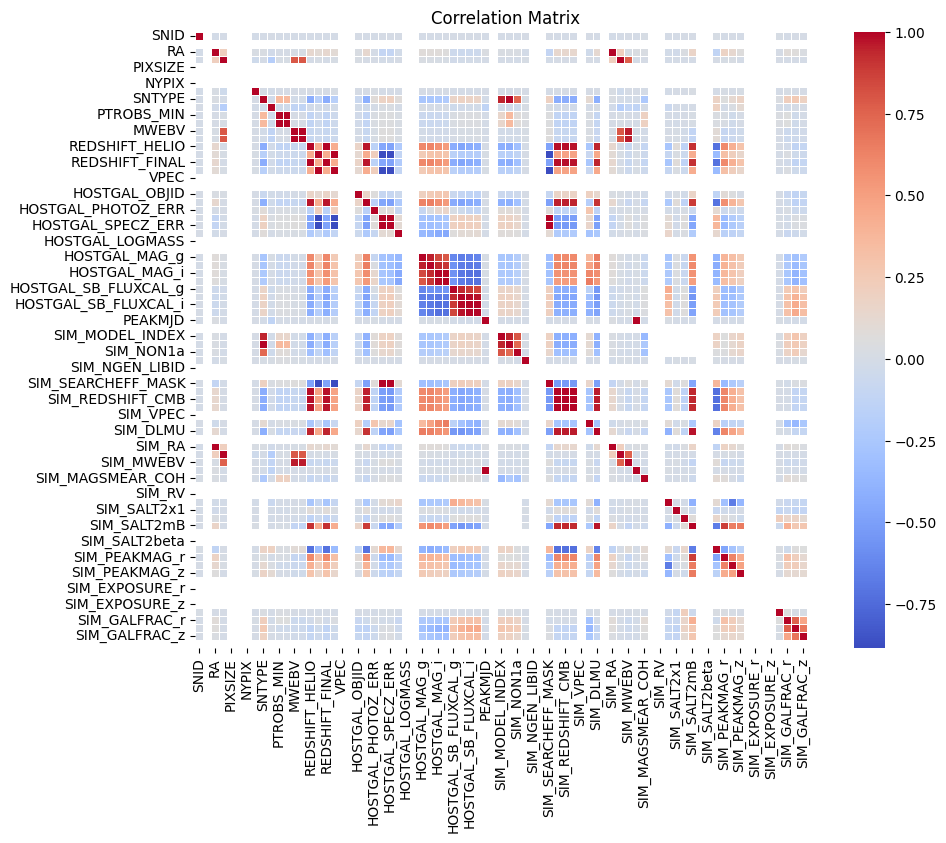

In [ ]:
corr_matrix = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# MEAN , MODE , MEDIAN , STND DVTN

In [ ]:
df_feature = df.copy()
df_feature.drop(columns = ['SNTYPE'], inplace = True)
mean_val= (df_feature.mean(numeric_only=True))
median_val = (df_feature.median(numeric_only=True))
std_dev = (df_feature.std(numeric_only=True))
df_feature = df_feature.select_dtypes(include = 'number')
maxx = df_feature.max()
minn = df_feature.min()
mean_val


SNID                   1.676771e+07
FAKE                   2.000000e+00
RA                     3.983534e+01
DECL                  -1.940749e+01
PIXSIZE                2.700000e-01
                           ...     
SIM_GALFRAC_g          1.019355e+01
SIM_GALFRAC_r          3.732287e+00
SIM_GALFRAC_i          4.883576e+00
SIM_GALFRAC_z          7.001202e+00
SIM_SUBSAMPLE_INDEX   -9.000000e+00
Length: 77, dtype: float64

In [ ]:
maxx

SNID                   3.359532e+07
FAKE                   2.000000e+00
RA                     5.551206e+01
DECL                   9.780500e-01
PIXSIZE                2.700000e-01
                           ...     
SIM_GALFRAC_g          6.577444e+04
SIM_GALFRAC_r          5.800674e+02
SIM_GALFRAC_i          2.593467e+02
SIM_GALFRAC_z          1.226156e+03
SIM_SUBSAMPLE_INDEX   -9.000000e+00
Length: 77, dtype: float64

In [ ]:
minn

SNID                   2.354000e+03
FAKE                   2.000000e+00
RA                     6.392980e+00
DECL                  -4.497672e+01
PIXSIZE                2.700000e-01
                           ...     
SIM_GALFRAC_g          1.006474e-32
SIM_GALFRAC_r          3.767641e-33
SIM_GALFRAC_i          9.054460e-14
SIM_GALFRAC_z          2.553218e-14
SIM_SUBSAMPLE_INDEX   -9.000000e+00
Length: 77, dtype: float64

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.0001


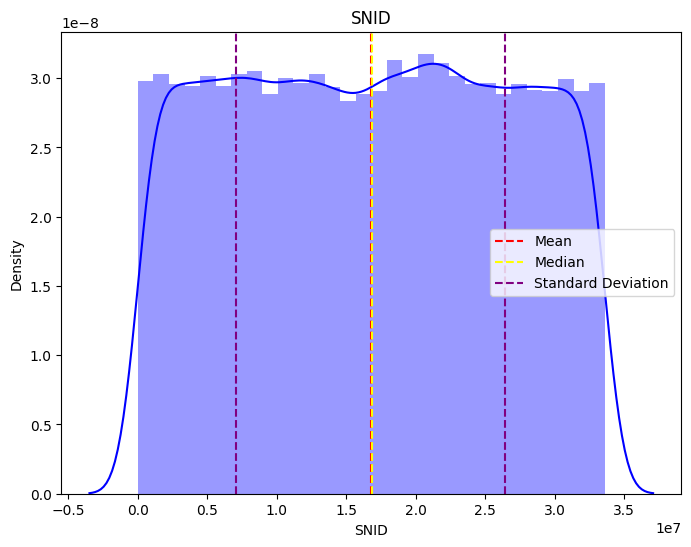

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


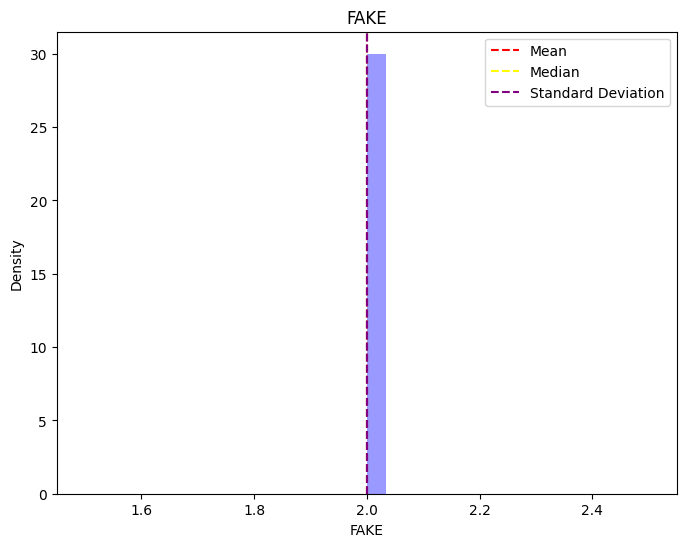

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -1.039


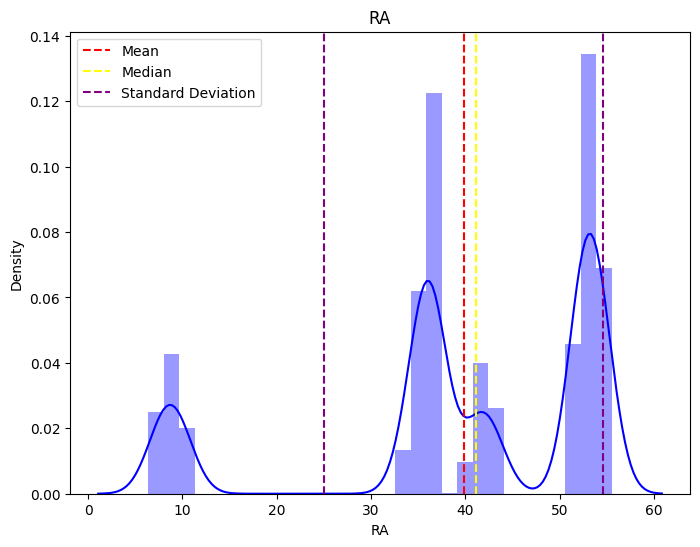

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -0.1421


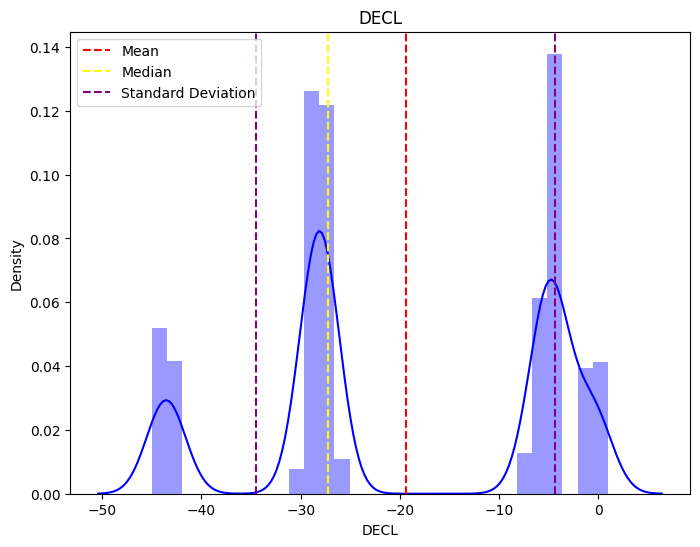

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


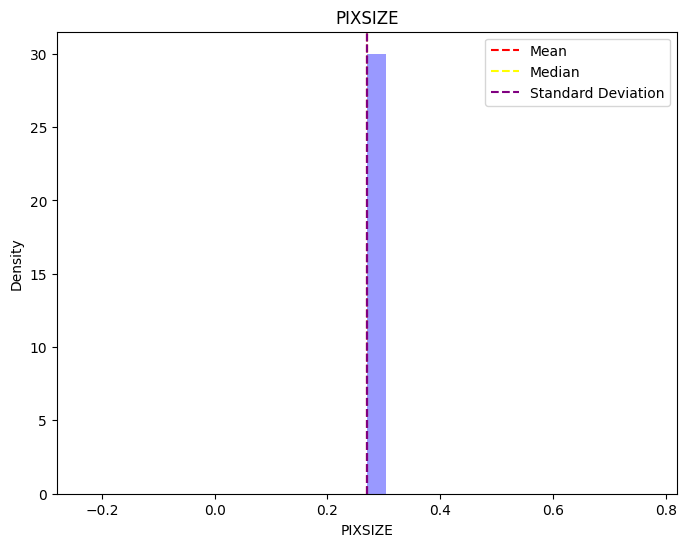

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


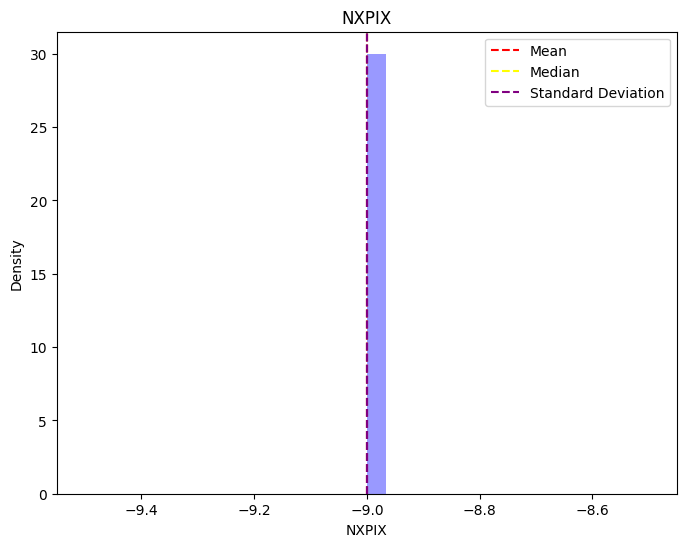

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


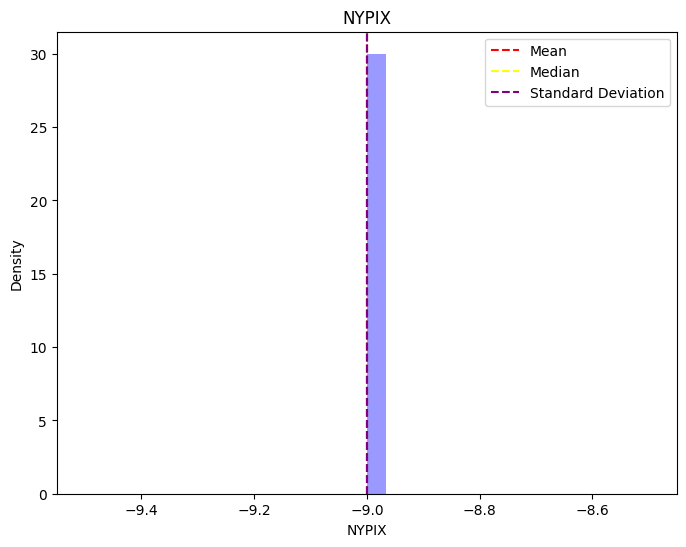

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.0002


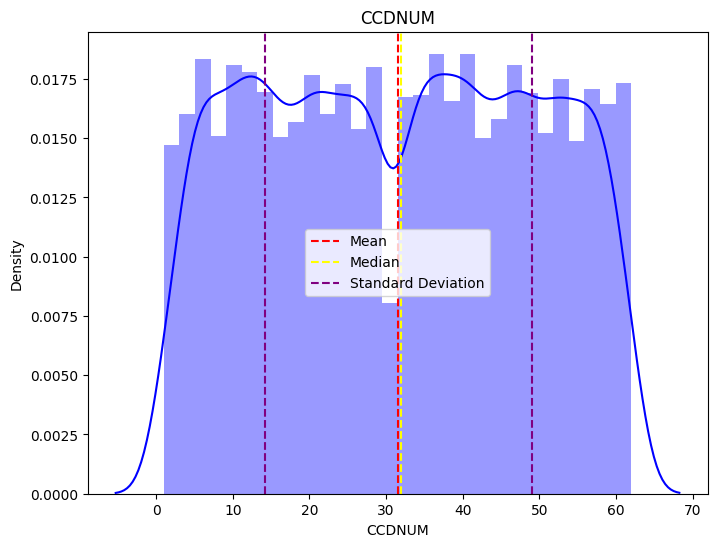

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 1.1068


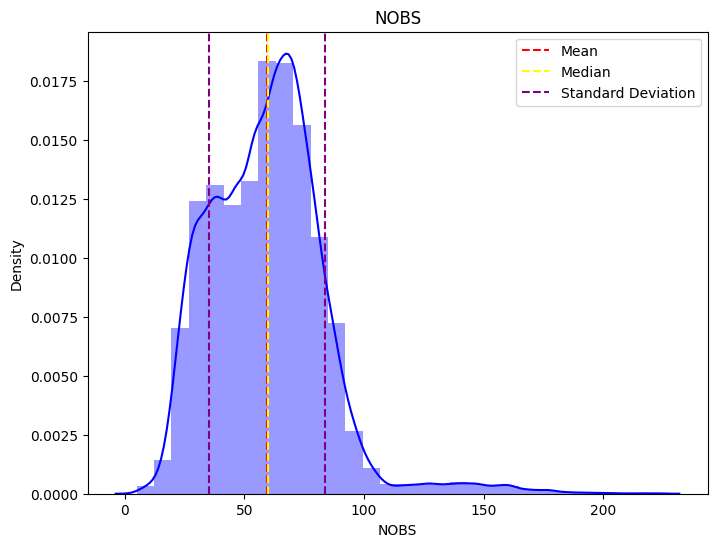

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.0434


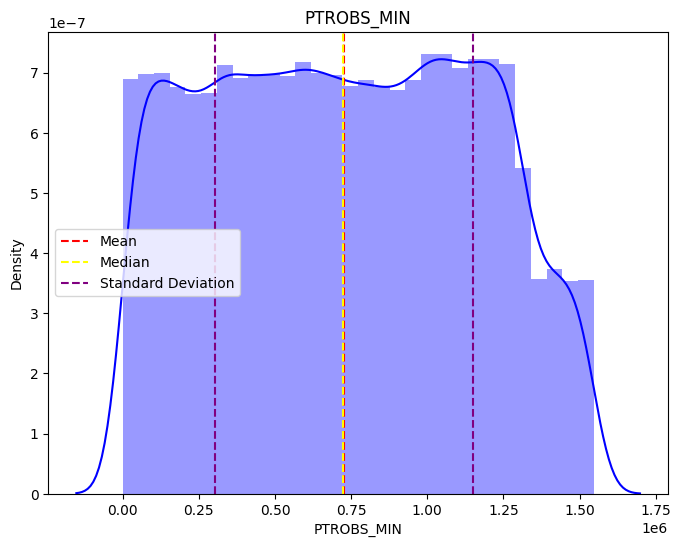

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.0434


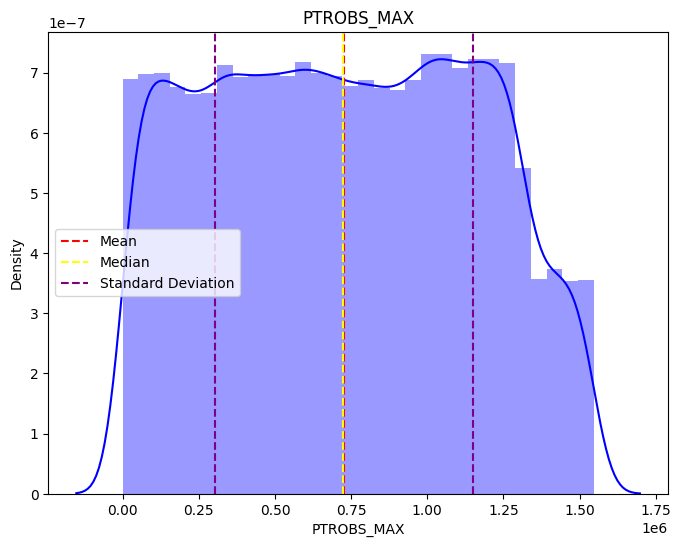

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 1.8722


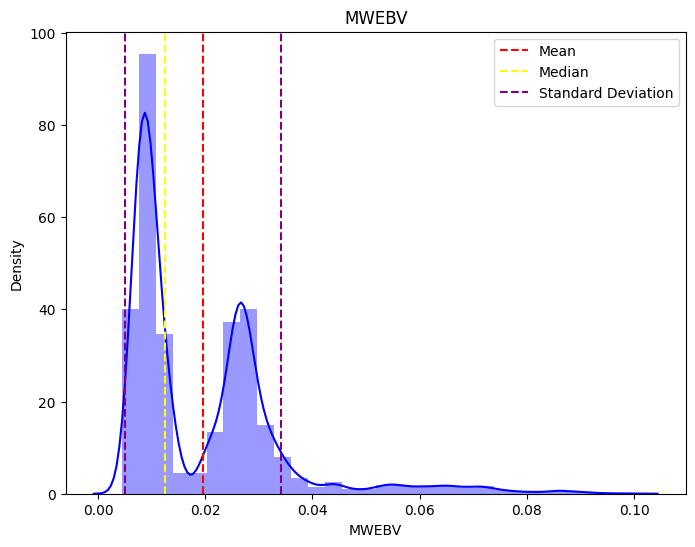

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 1.8722


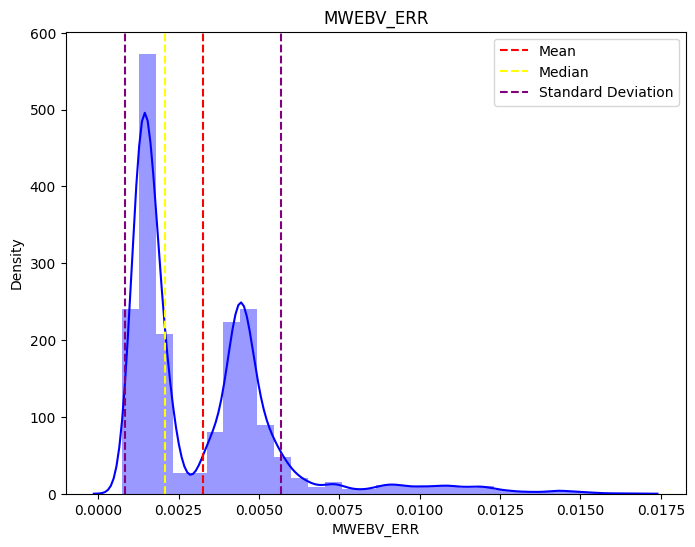

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.3267


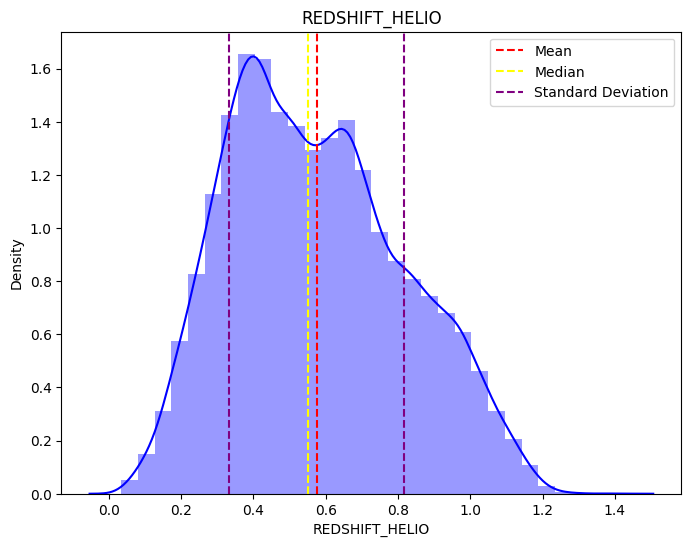

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 1.3711


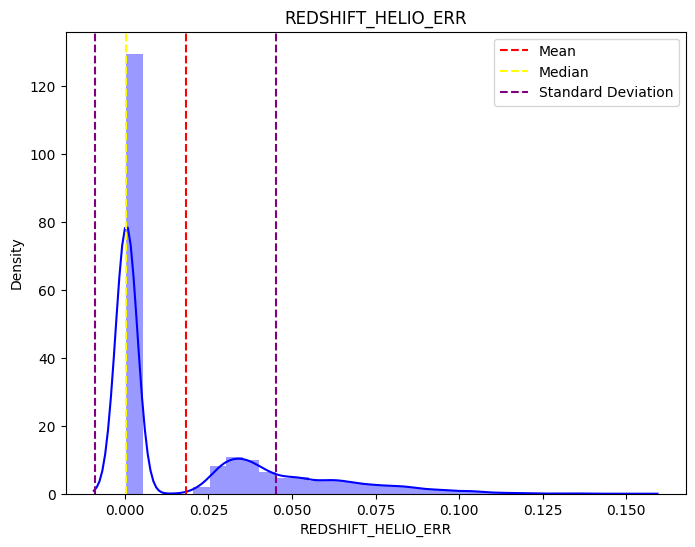

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.3269


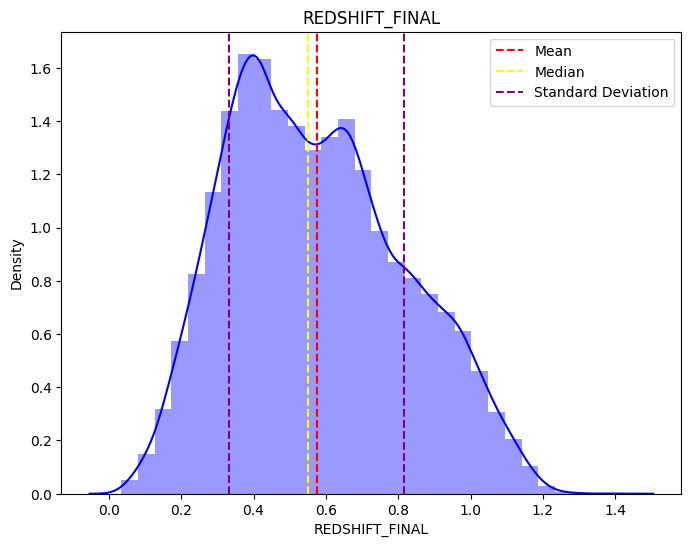

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 1.3711


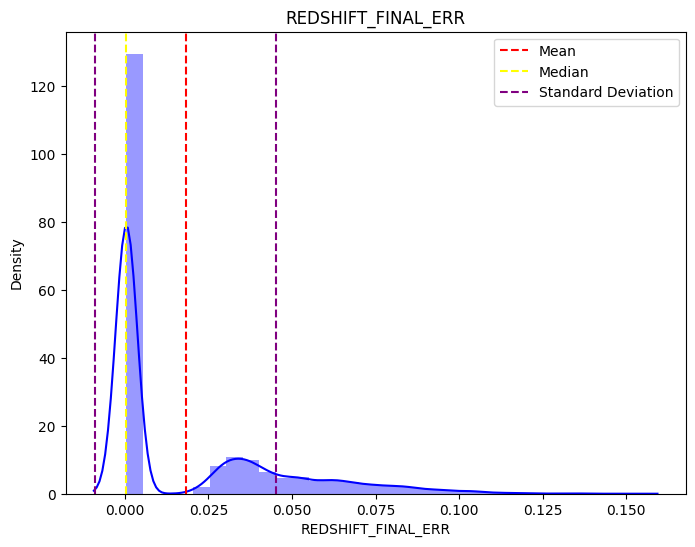

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


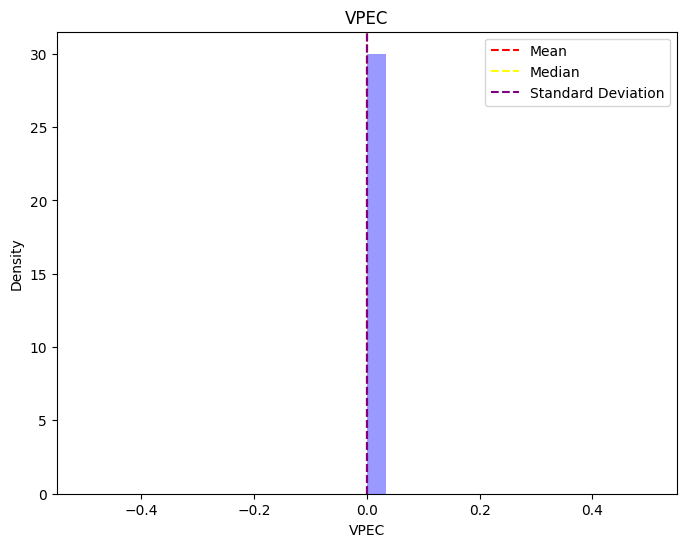

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


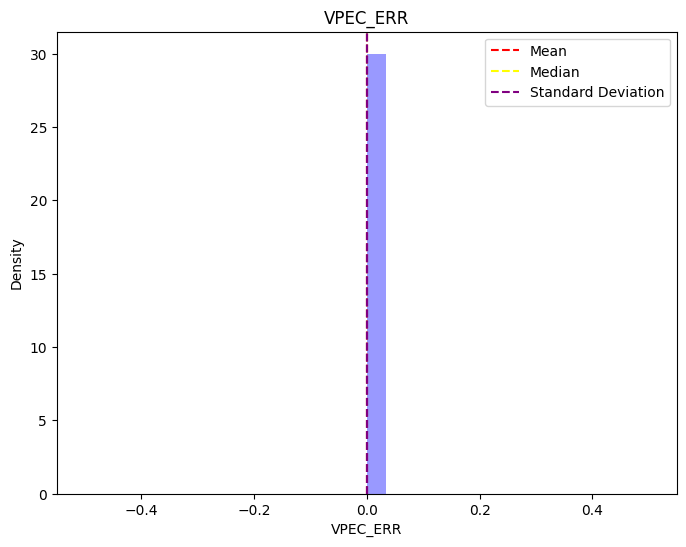

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -0.0793


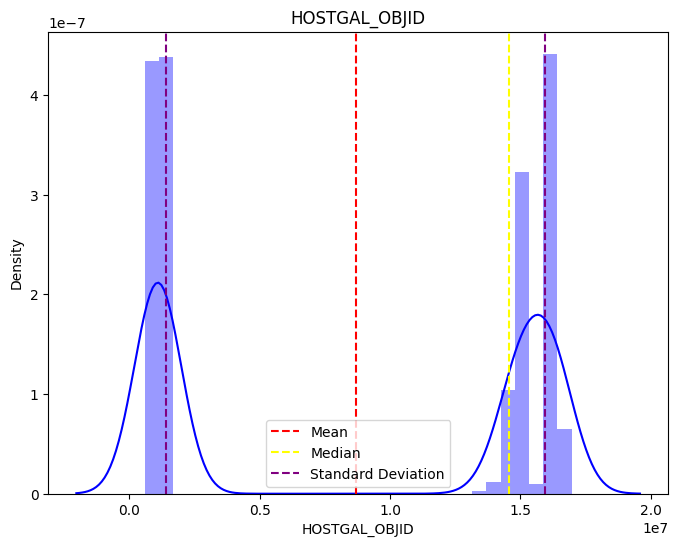

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.3789


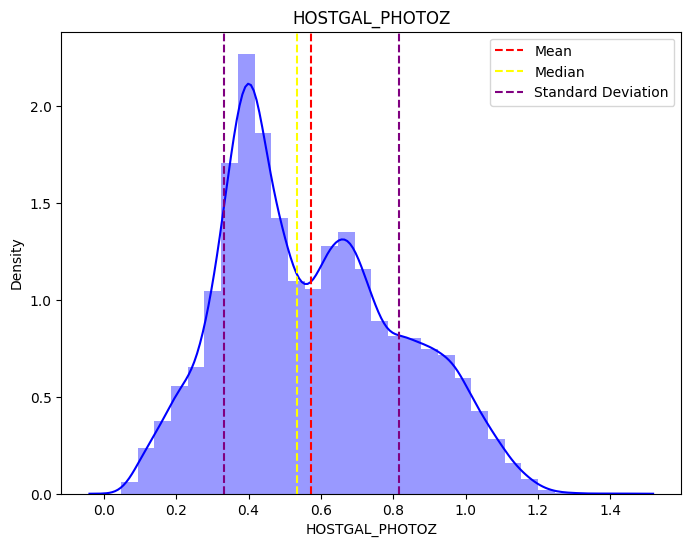

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.7722


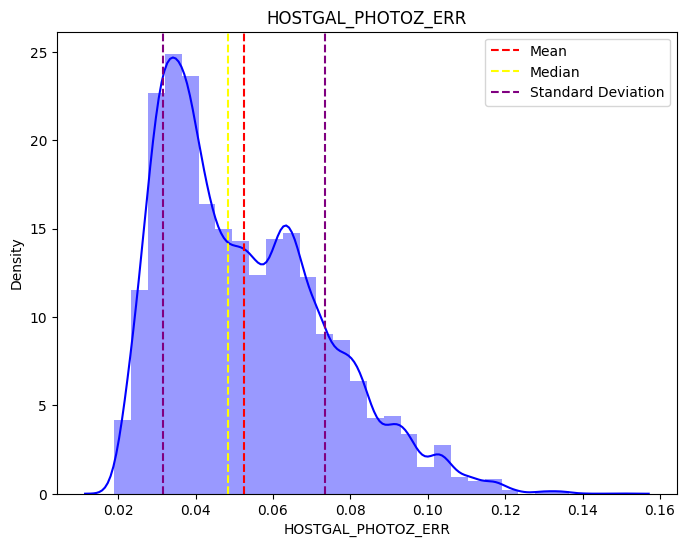

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -0.5953


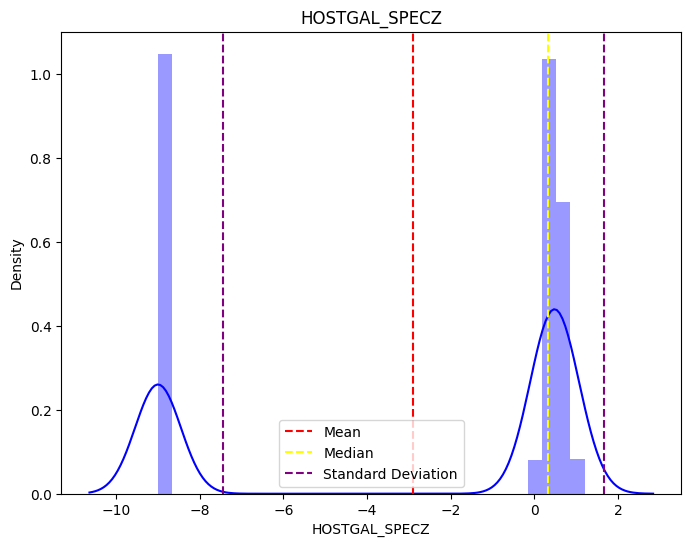

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -0.5995


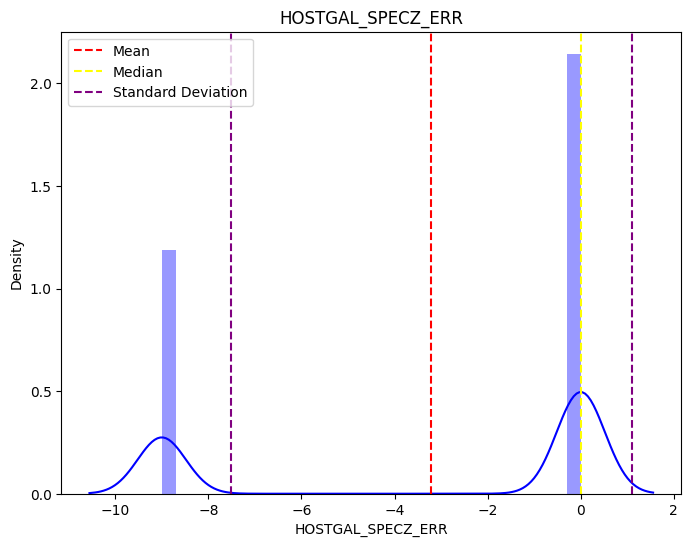

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 11.2868


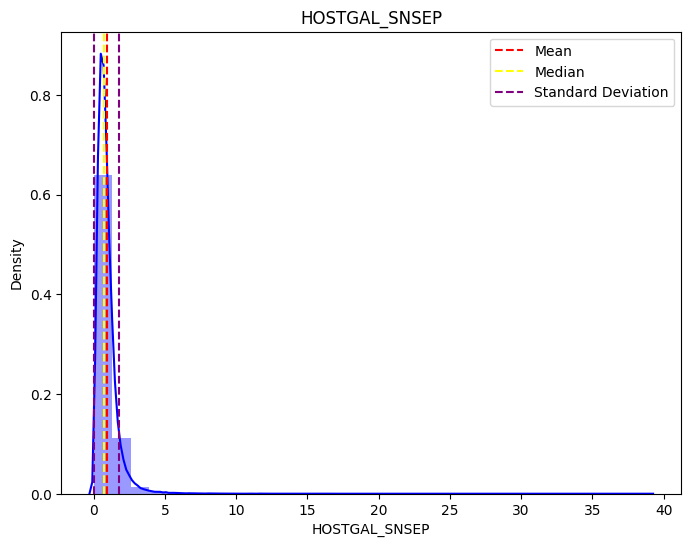

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


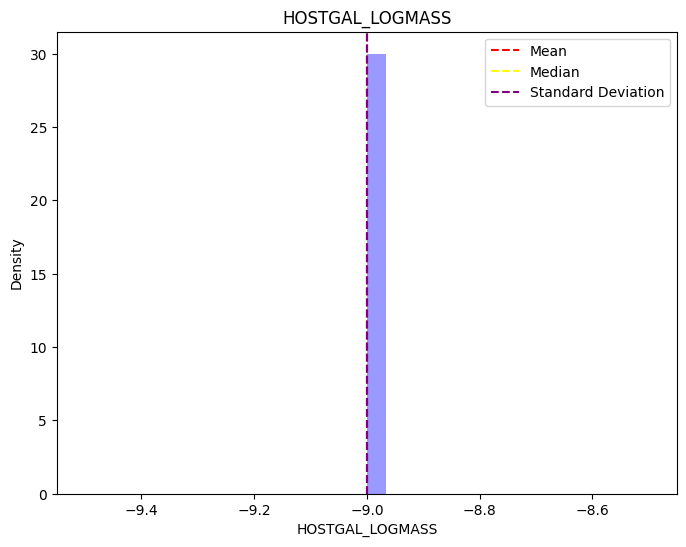

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


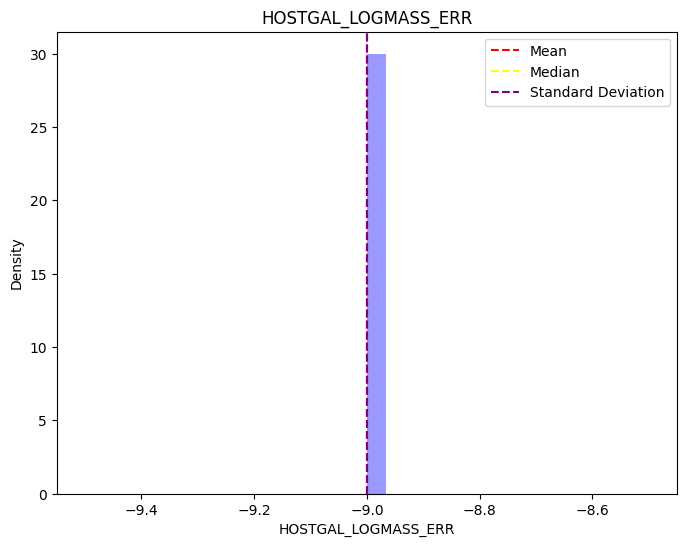

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 5.5931


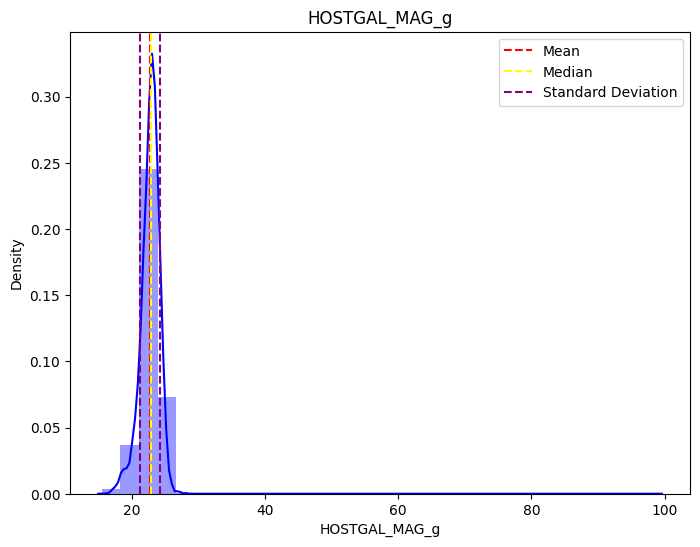

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 4.9598


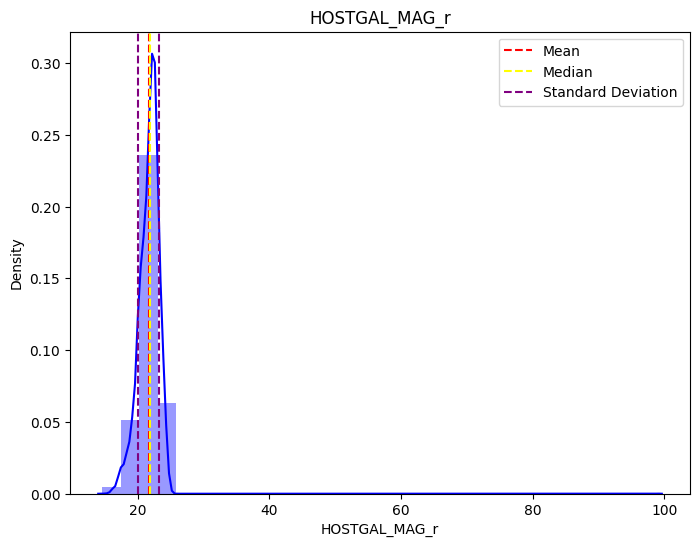

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -0.7012


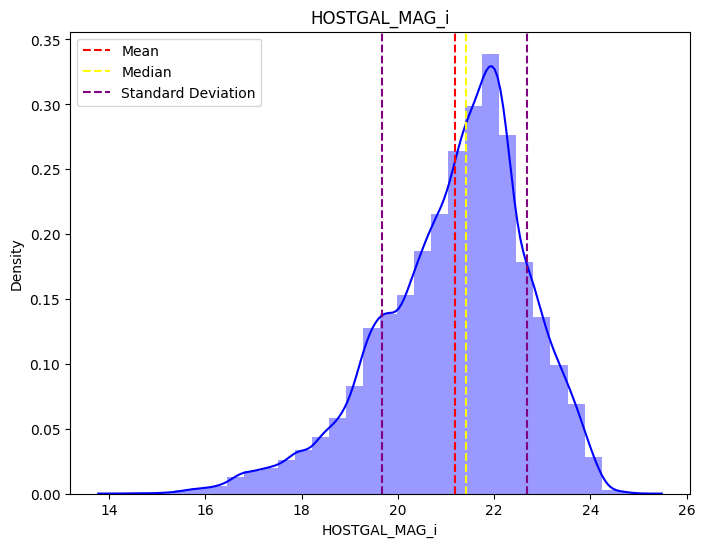

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -0.6461


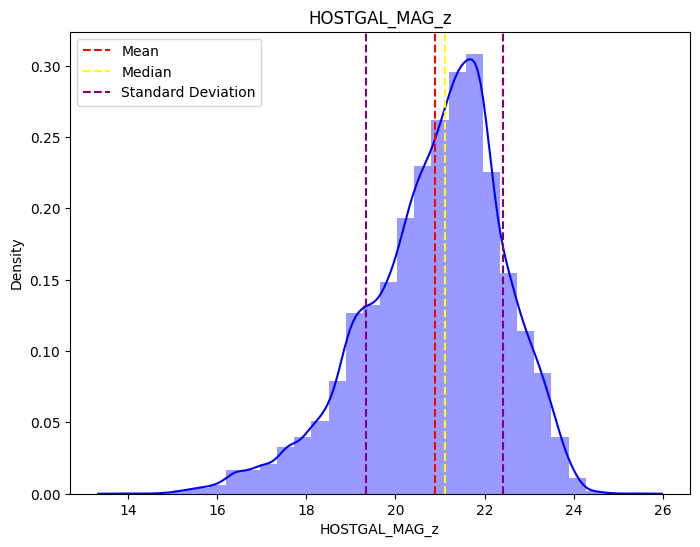

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 7.4071


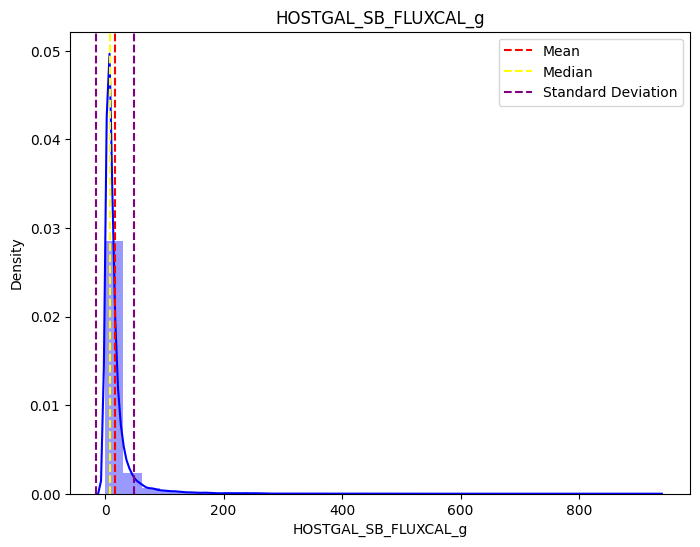

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 5.7881


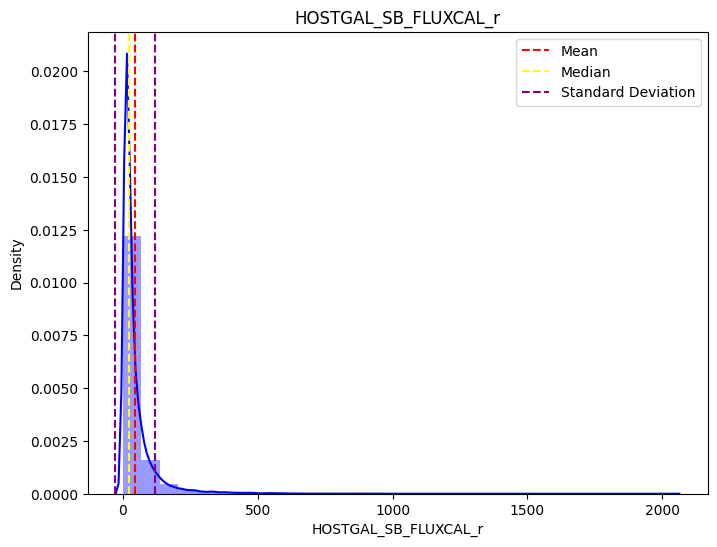

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 5.3053


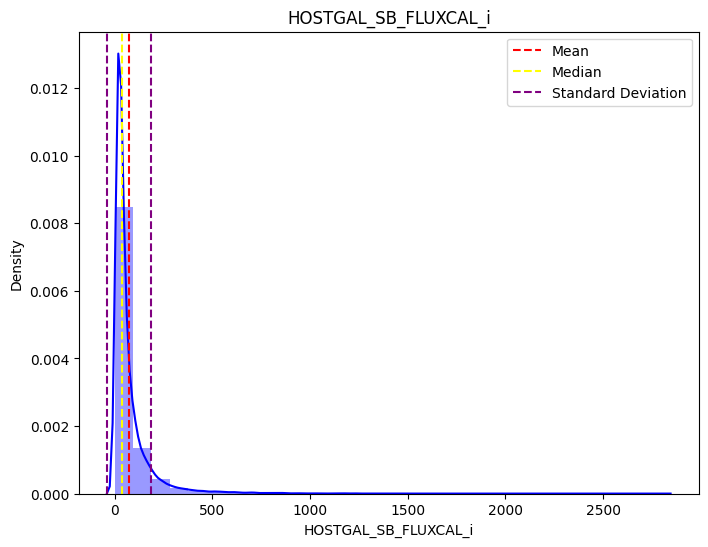

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 5.3613


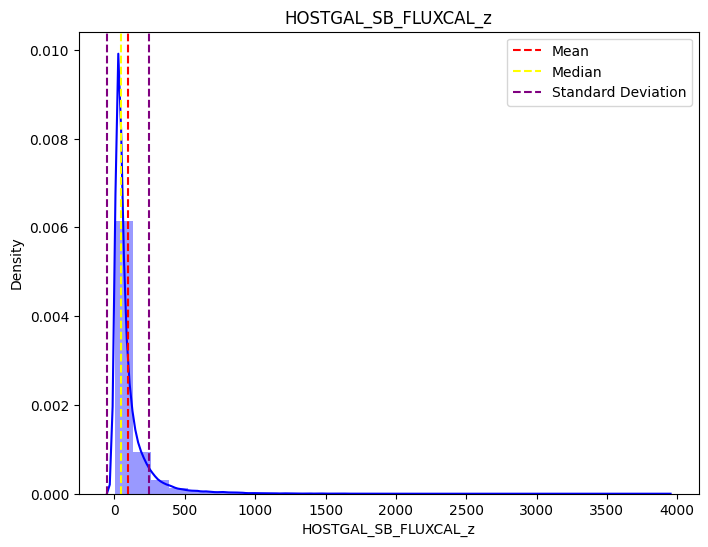

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -0.009


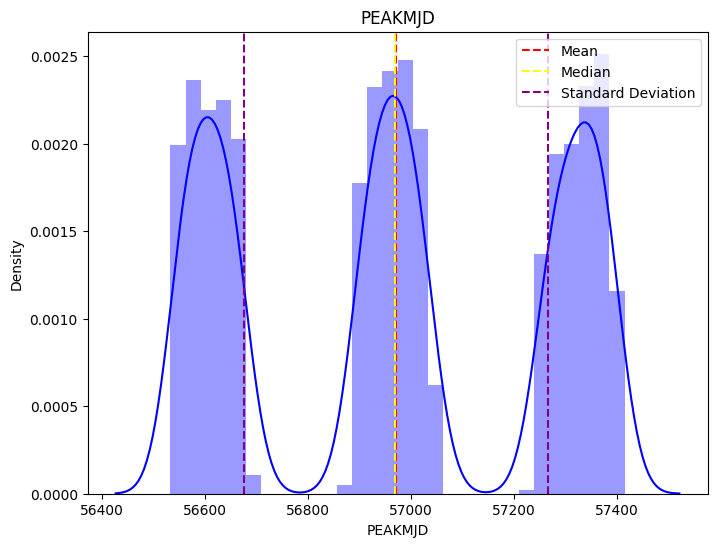

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


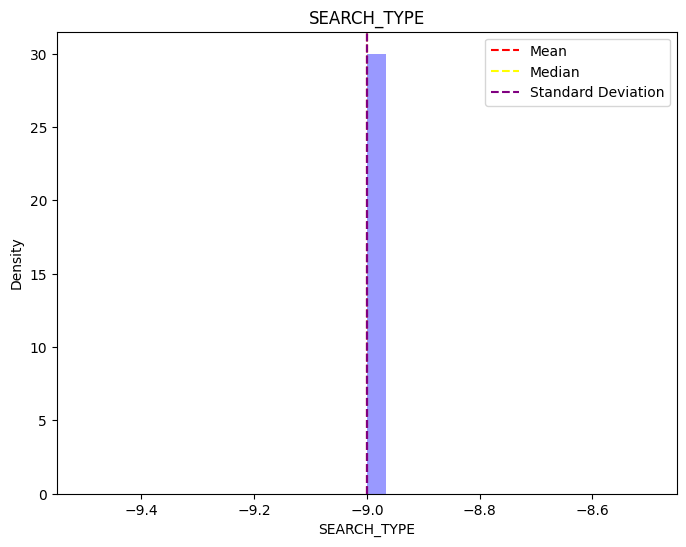

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -0.1756


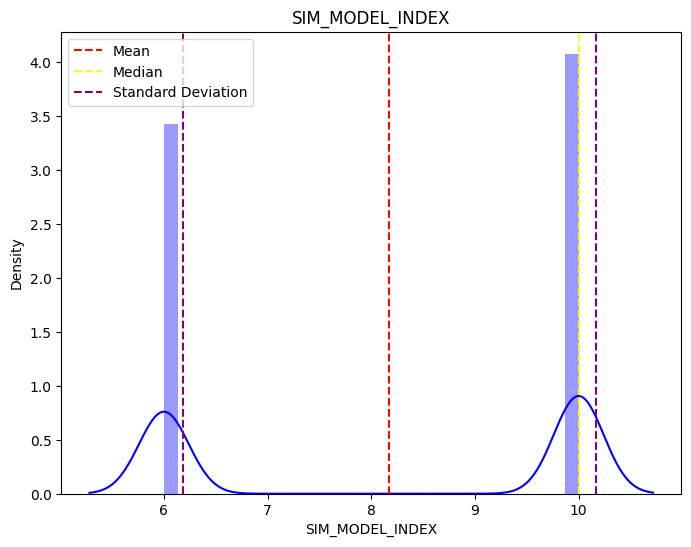

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.1477


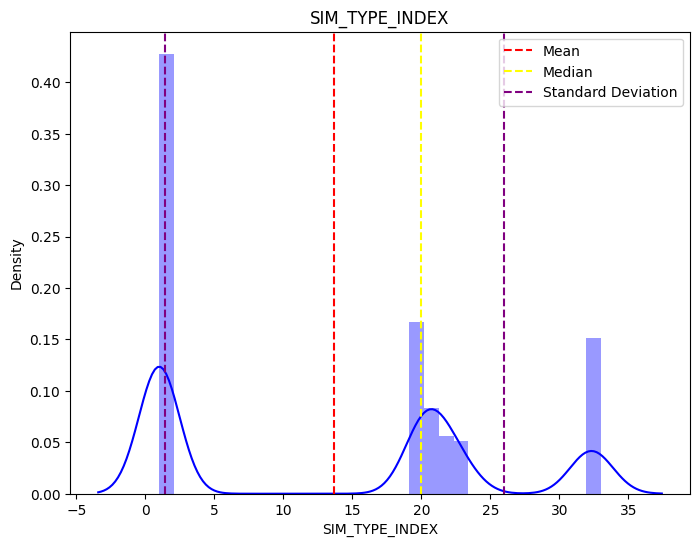

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.6672


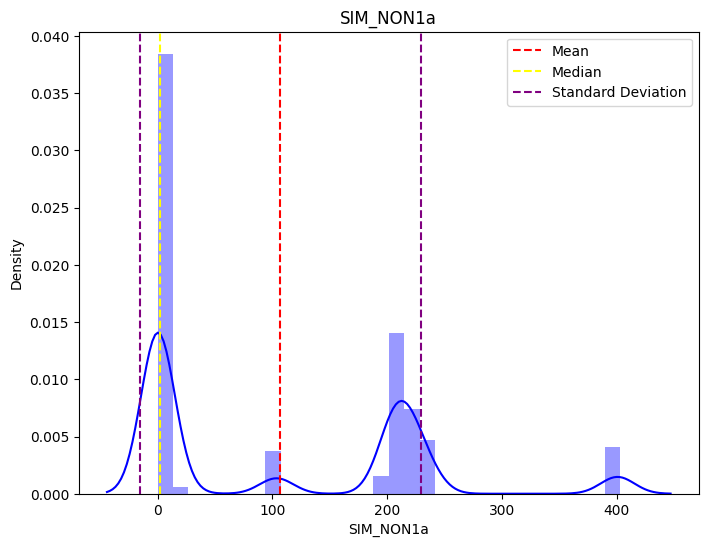

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -0.0052


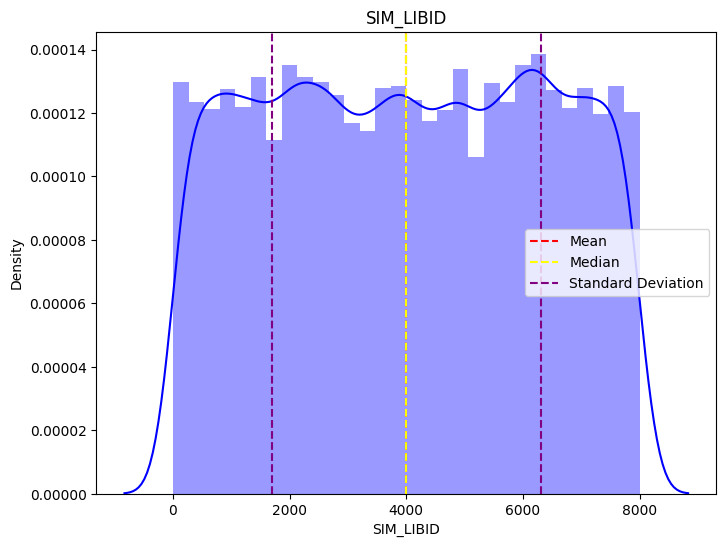

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


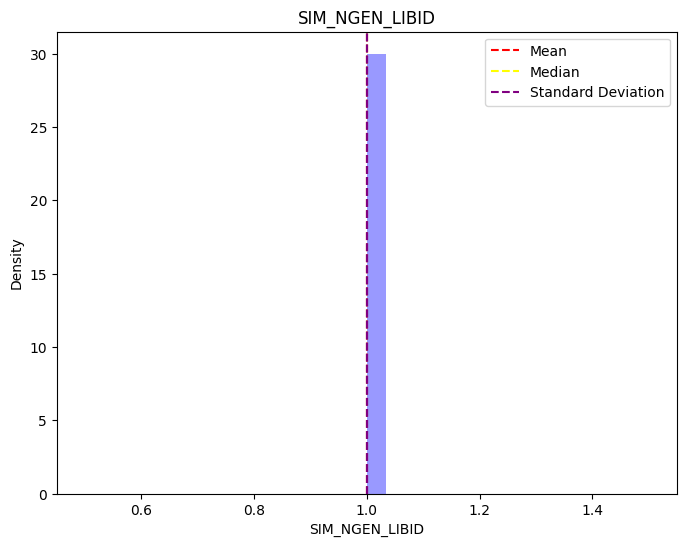

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


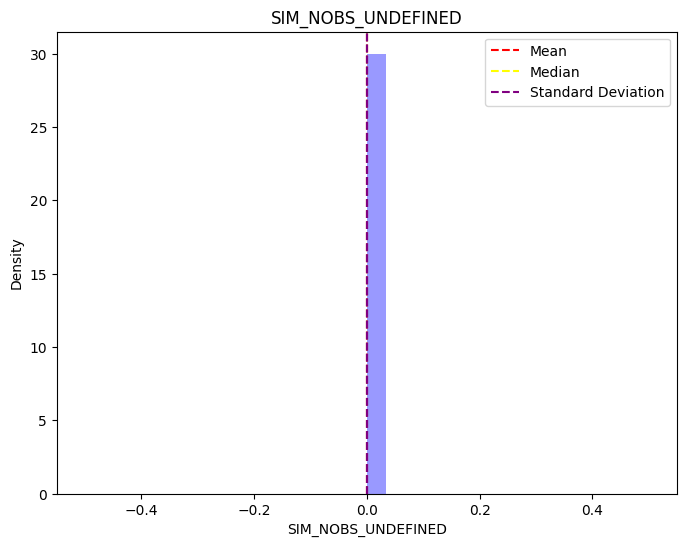

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -0.5995


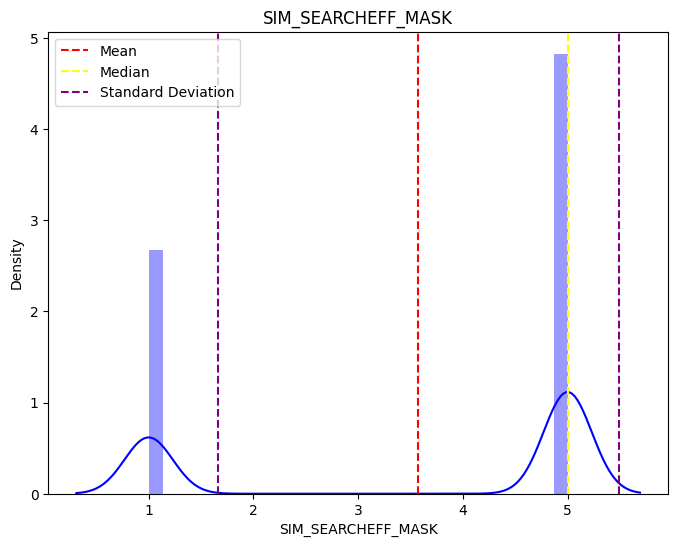

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.3839


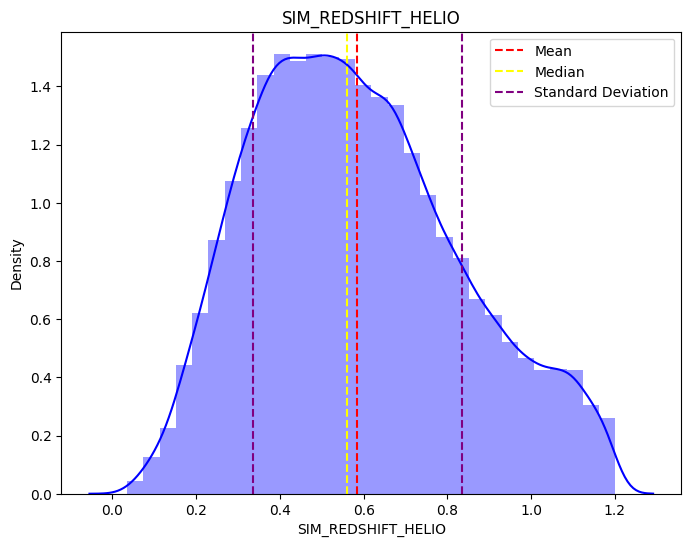

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.3841


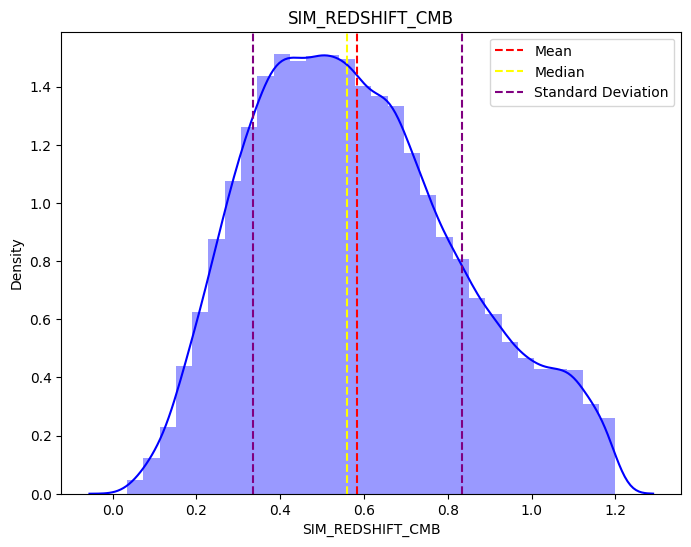

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.3837


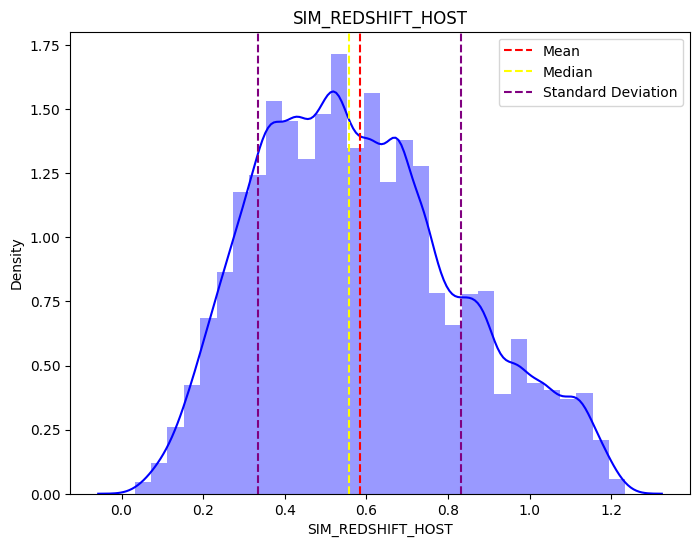

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


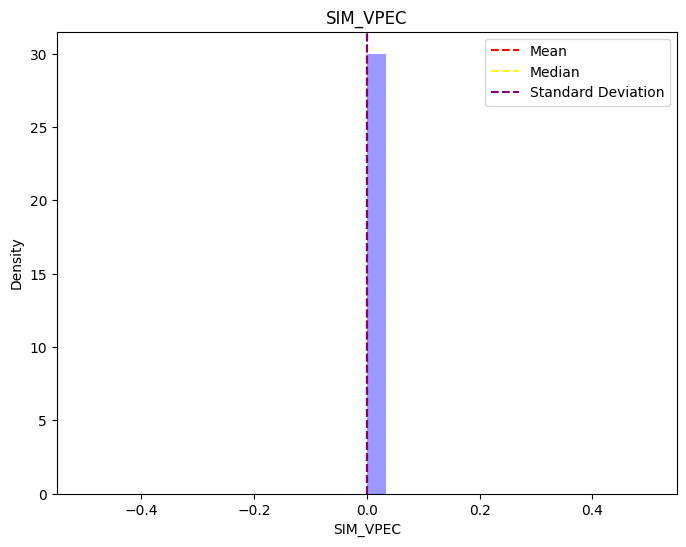

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.4233


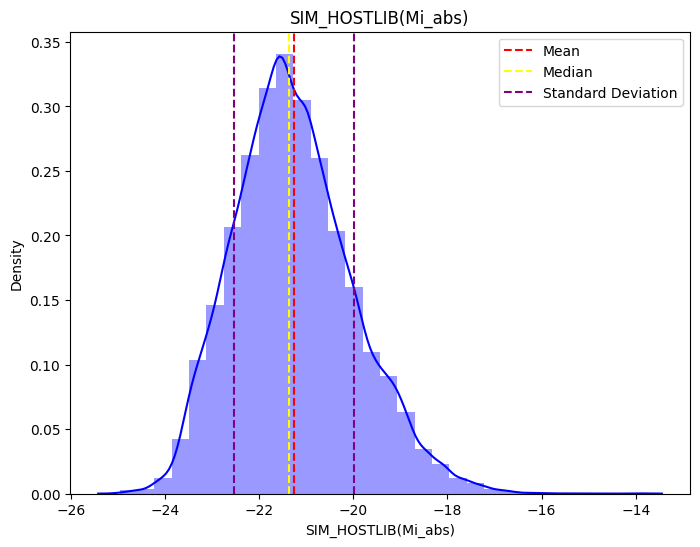

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -0.6815


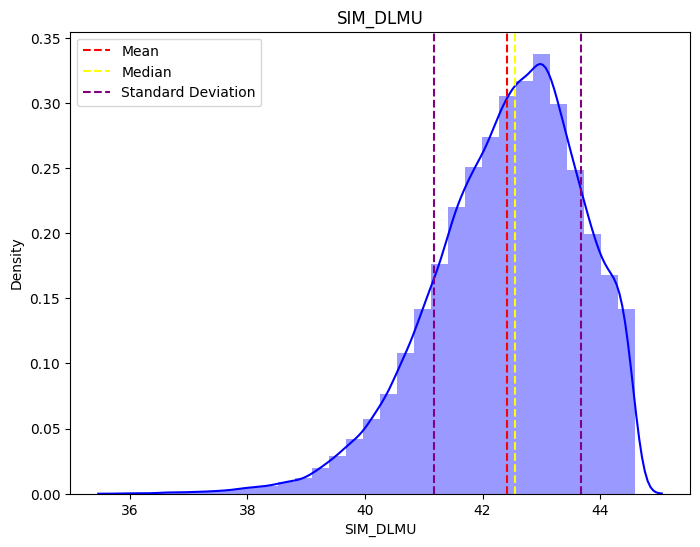

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


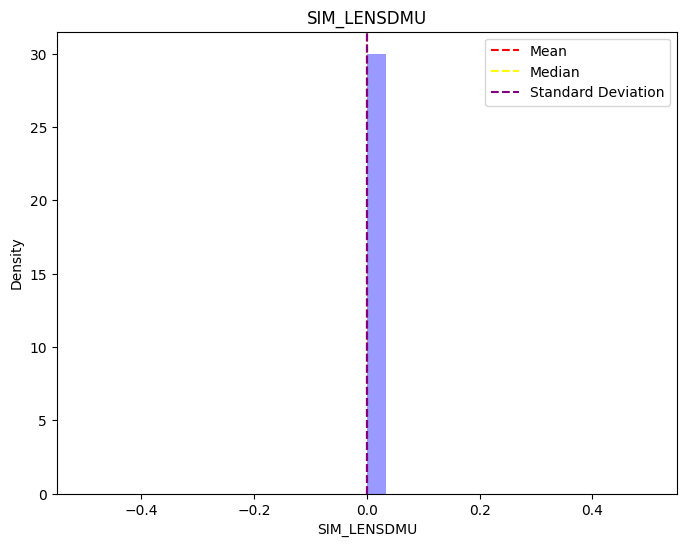

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -1.039


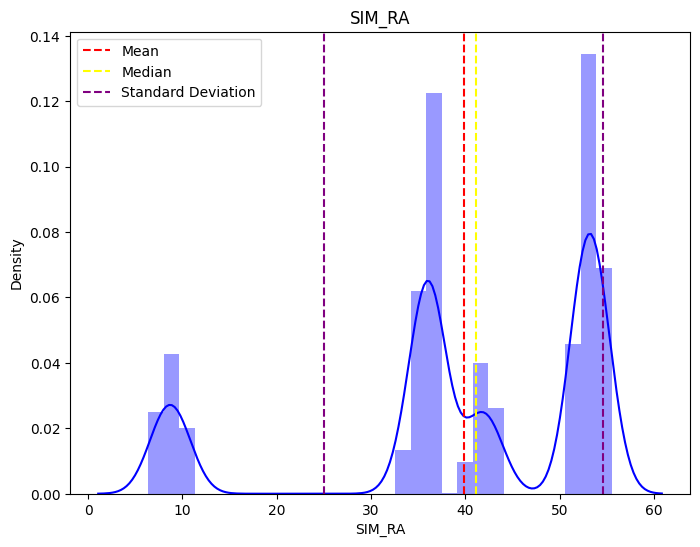

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -0.1421


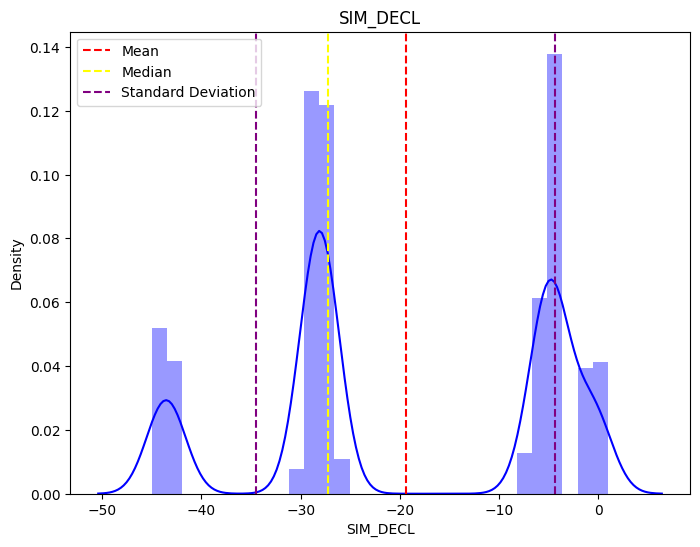

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 1.9969


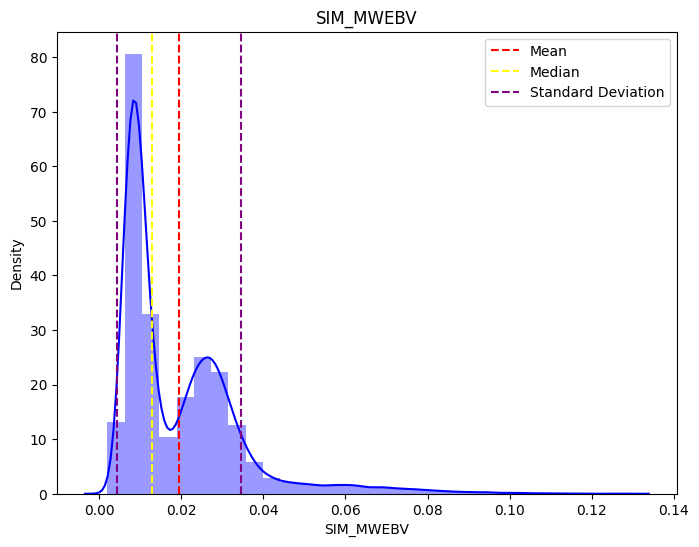

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -0.009


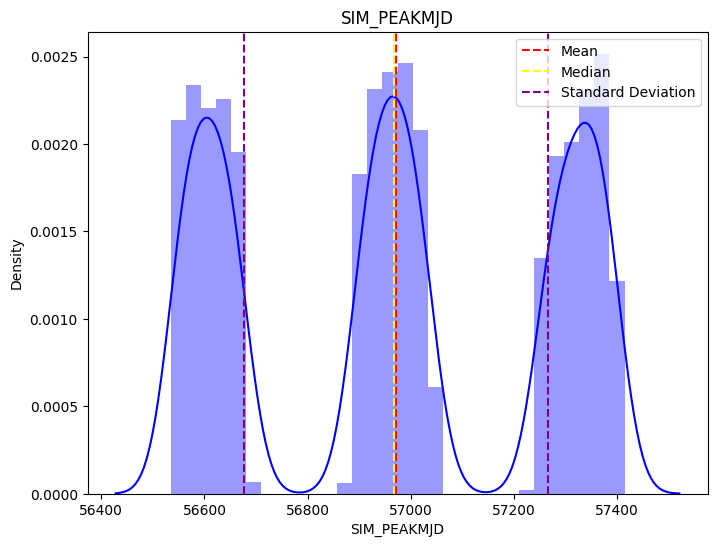

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -1.7162


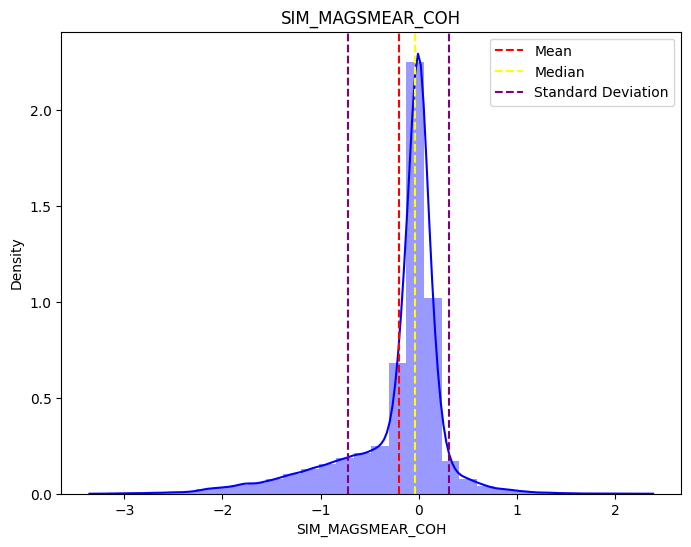

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


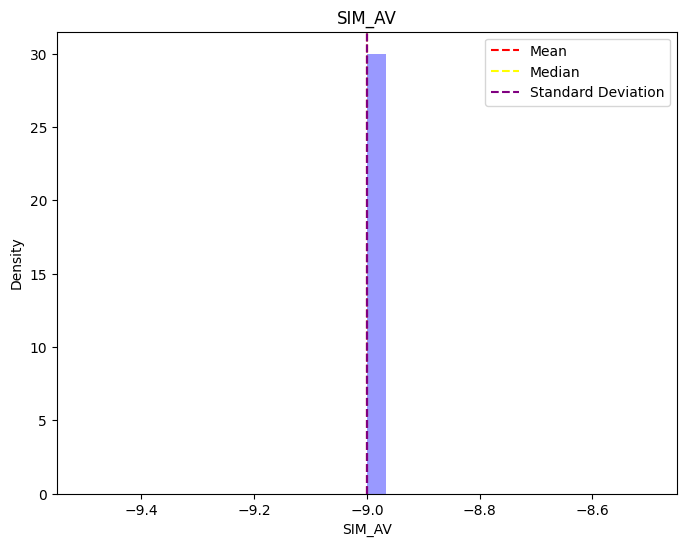

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


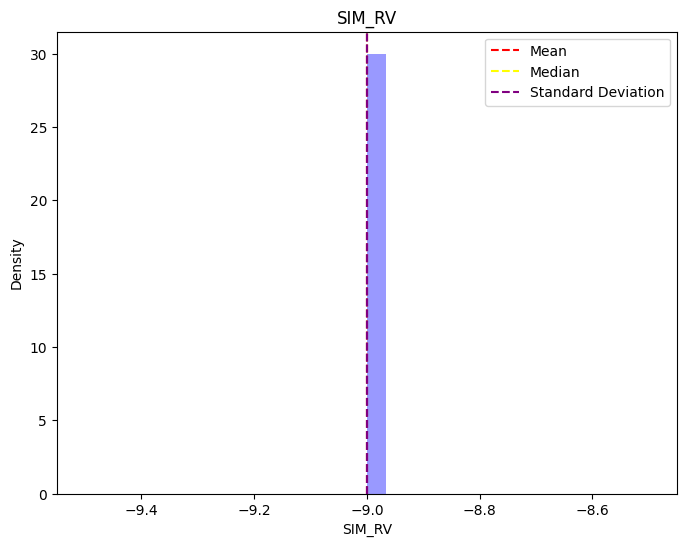

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 40.3224


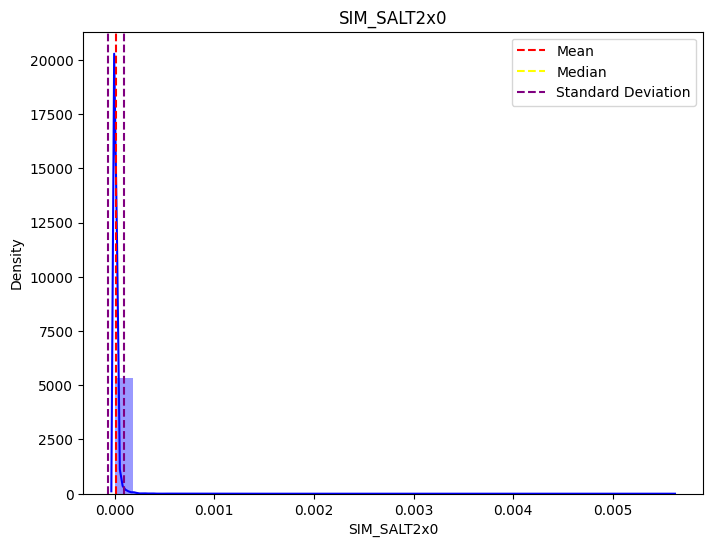

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -0.9132


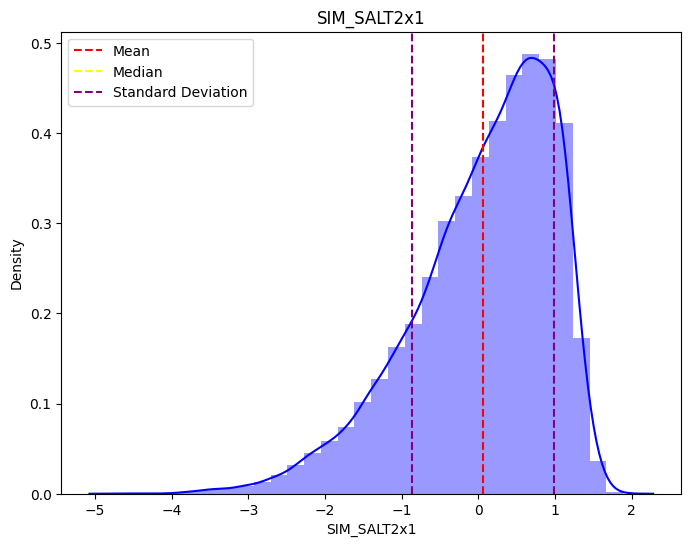

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.6047


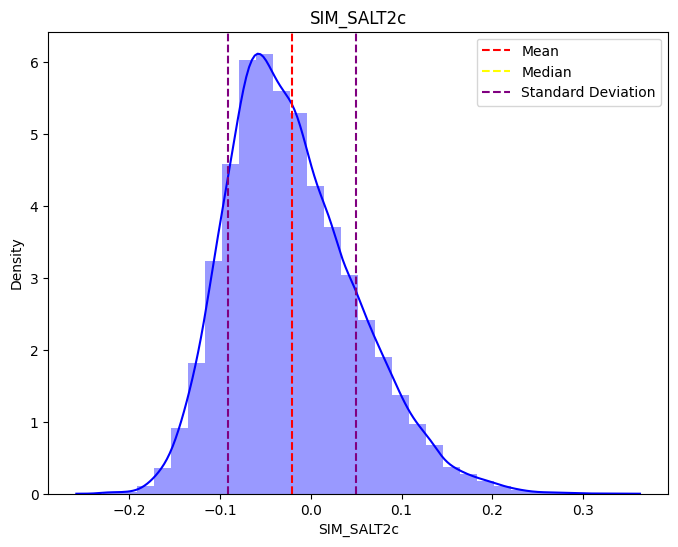

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -1.0455


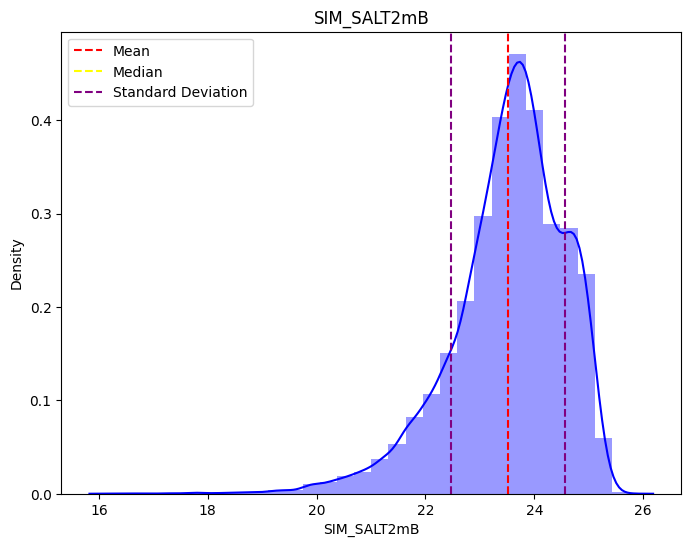

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


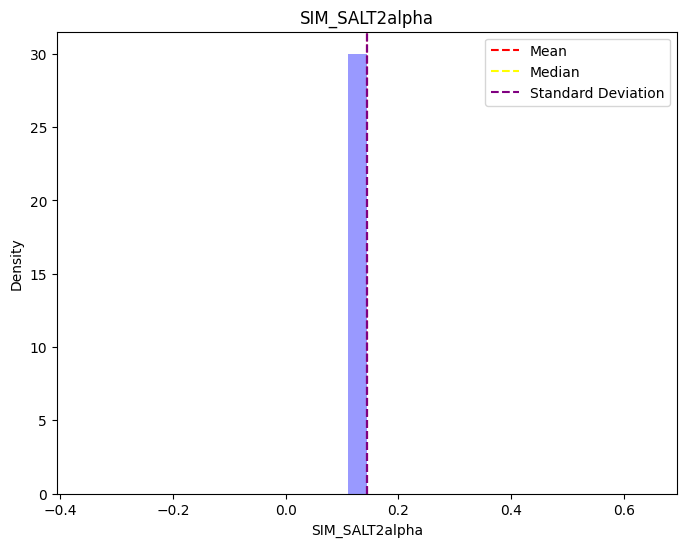

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 0.0


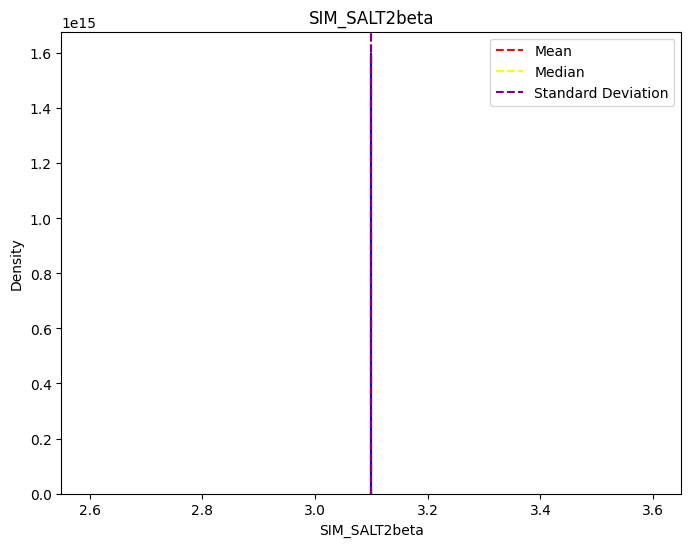

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -0.6255


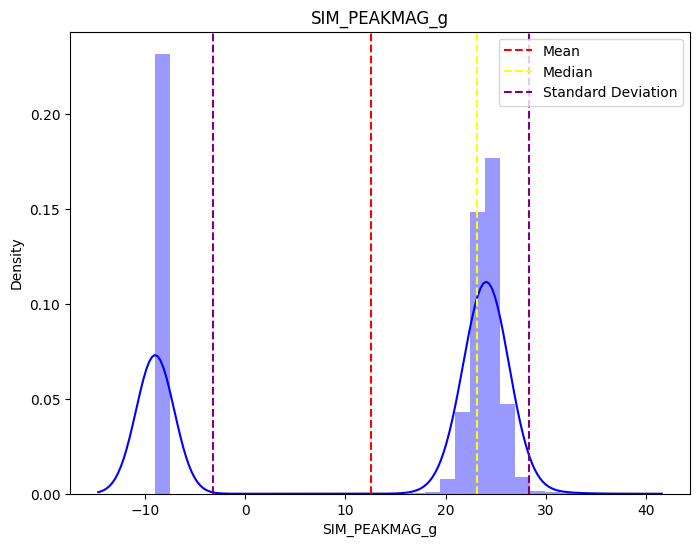

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -5.414


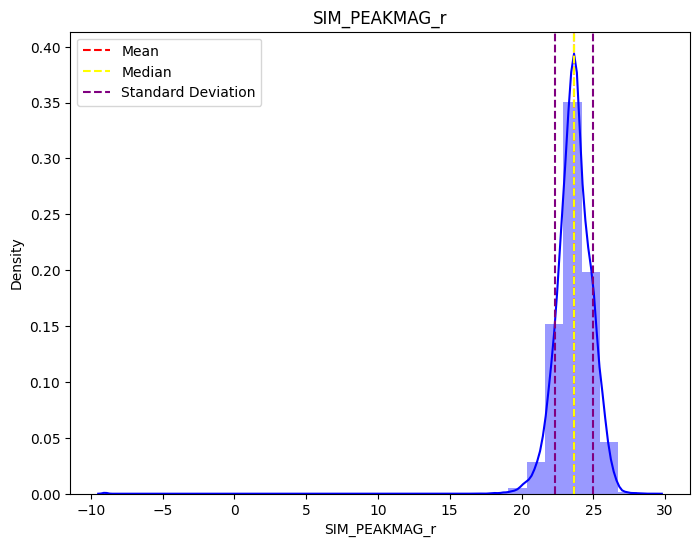

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -13.1421


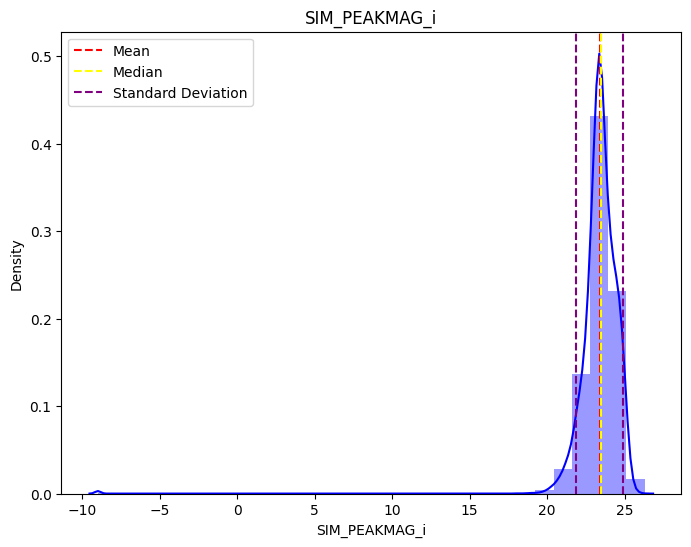

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: -5.9008


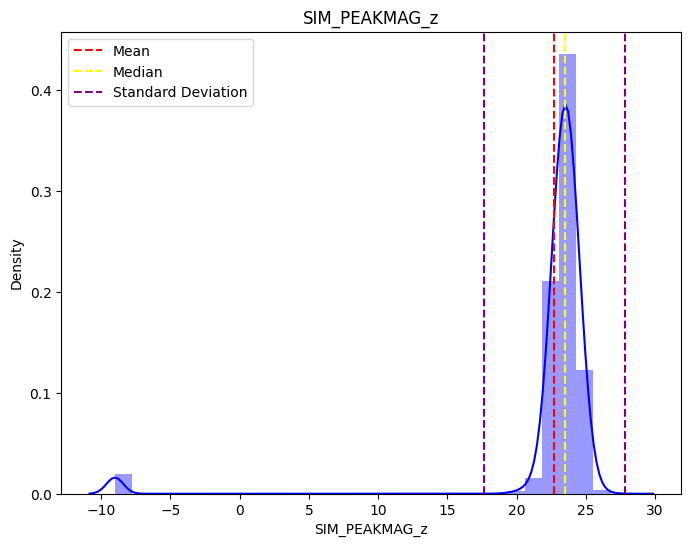

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


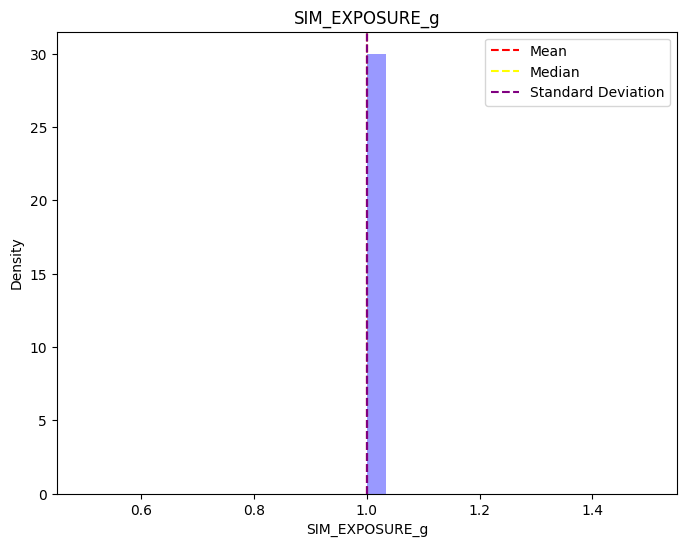

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


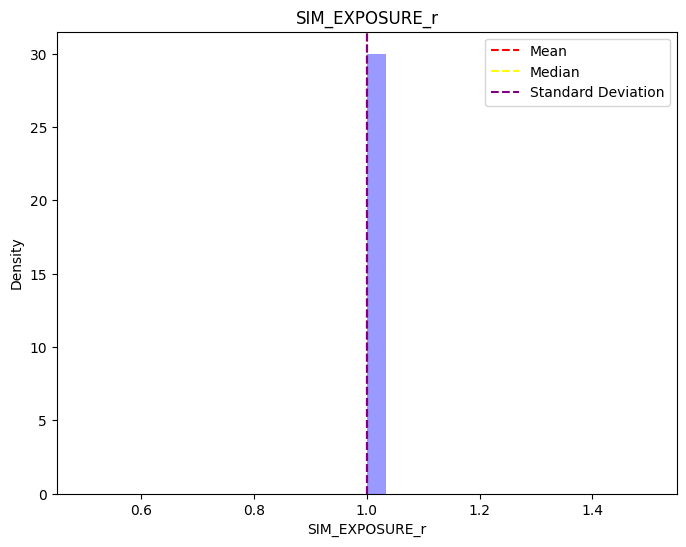

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


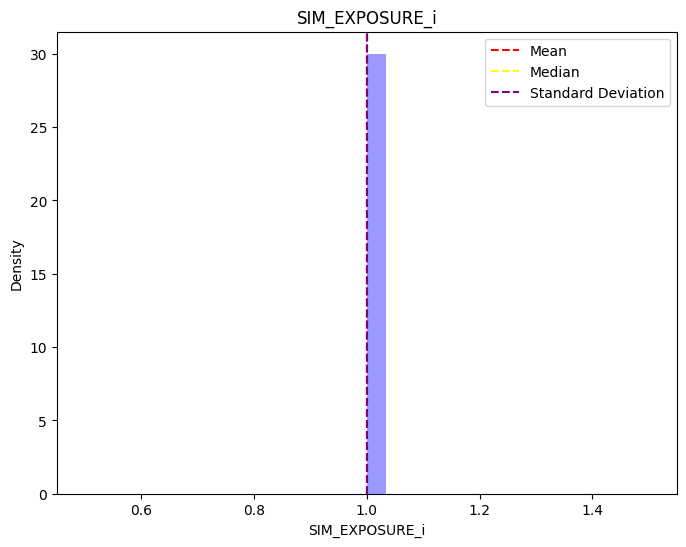

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


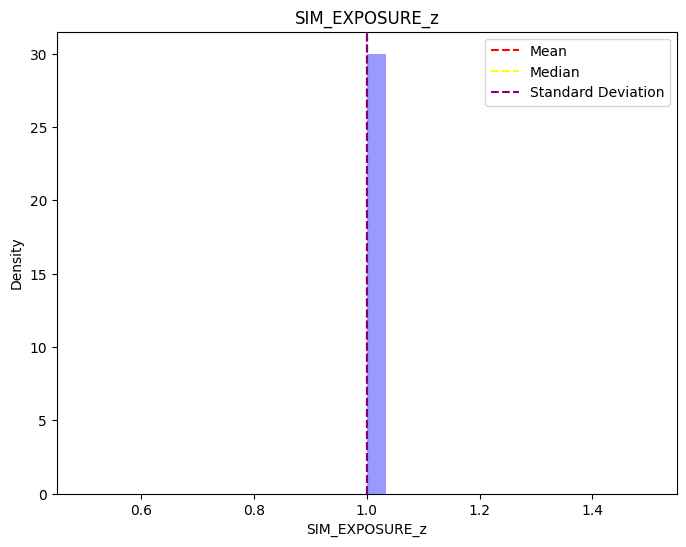

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 110.8329


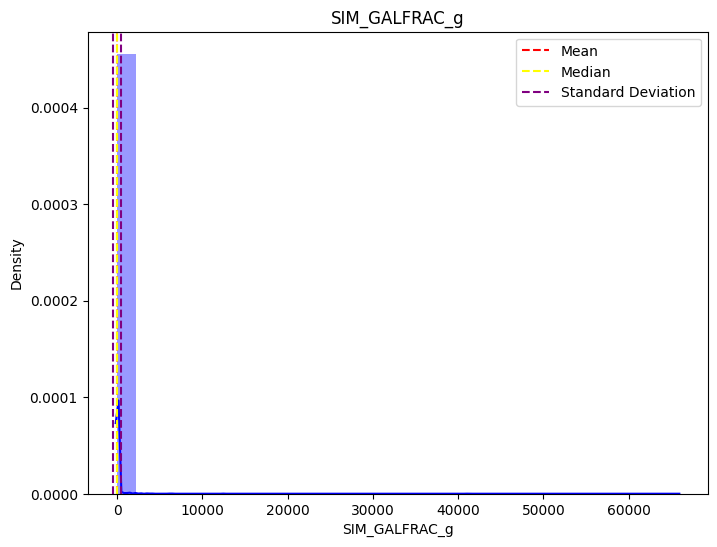

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 22.847


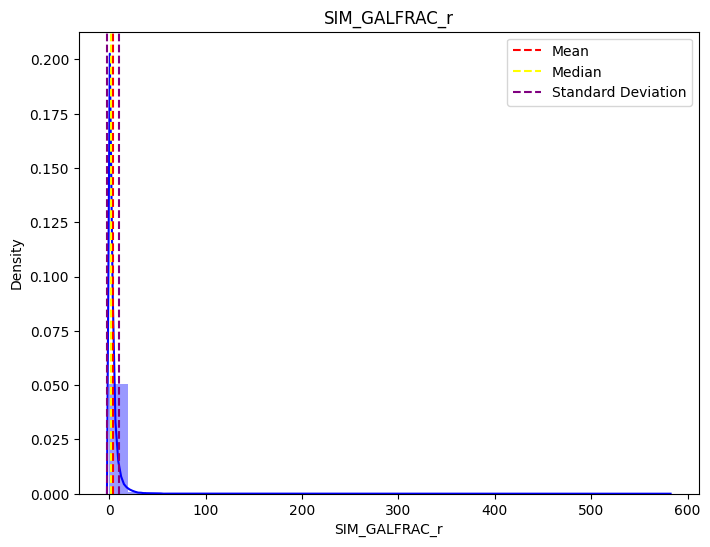

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 7.28


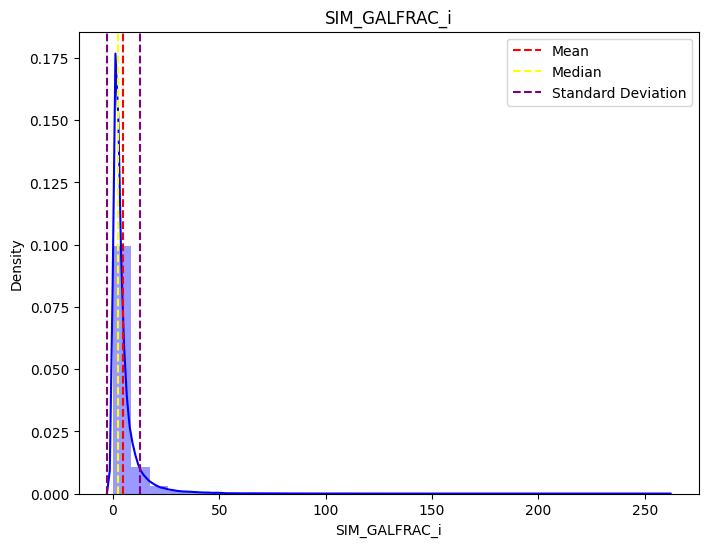

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')


Skewness: 26.0624


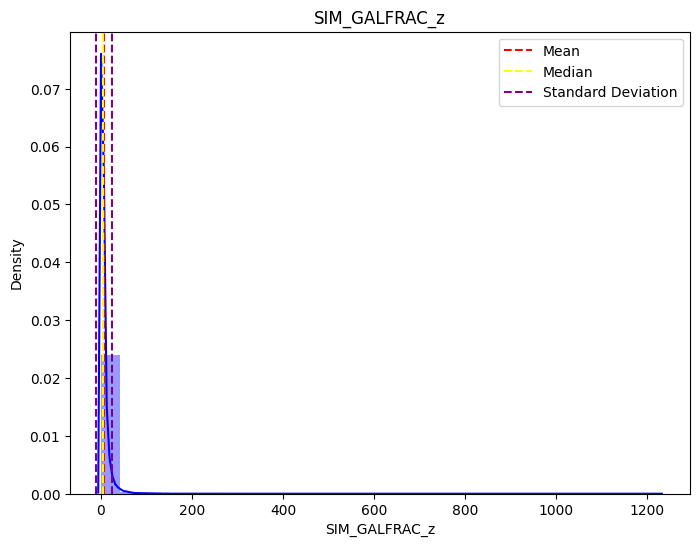

<ipython-input-13-f34c86f0dea7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Skewness: 0.0


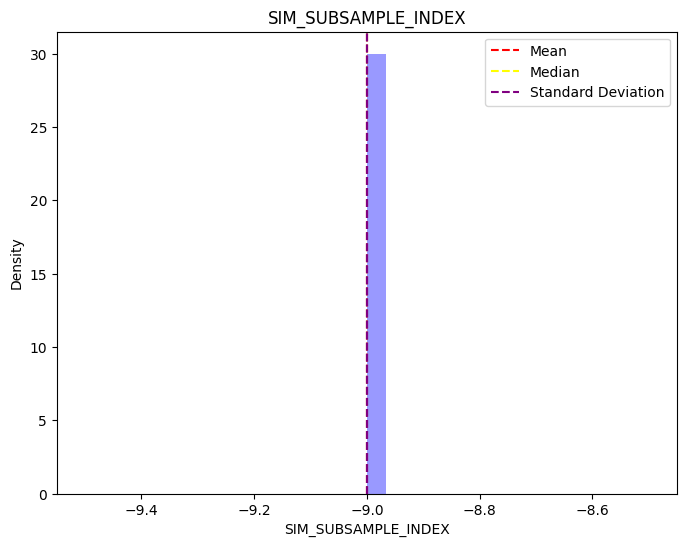

In [ ]:
for column in df_feature.columns:
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.distplot(df_feature[column], hist=True, kde=True, rug=False, bins=30, color='blue')

    # Calculate mean, median, and standard deviation
    mean_val = np.mean(df_feature[column])
    median_val = np.median(df_feature[column])
    std_dev = np.std(df_feature[column])

    # Plot lines for mean, median, and standard deviation
    plt.axvline(x=mean_val, color='red', linestyle='--', label='Mean')
    plt.axvline(x=median_val, color='yellow', linestyle='--', label='Median')
    plt.axvline(x=mean_val + std_dev, color='purple', linestyle='--', label='Standard Deviation')
    plt.axvline(x=mean_val - std_dev, color='purple', linestyle='--')

    # Set title with column name
    plt.title(column)

    # Show legend
    plt.legend()
    if pd.api.types.is_numeric_dtype(df_feature[column]):
        skewness = df_feature[column].skew()
        if not np.isnan(skewness):
            print("Skewness:", round(float(skewness), 4))
        else:
            print("Skewness: N/A (No skewness for this data)")
    else:
        print("Skewness: N/A (Non-numeric data)")
    plt.show()


YES THE DATASET NEEDS NORMALISATION AS THE RANGE OF EVERY COLUMN IS VASTLY DIFFERENT HENCE FOR EFFICIENT CLASSIFICATION NORMALISATION IS REQUIRED

In [ ]:
# from tabulate import tabulate
# DIFF = np.abs(mean_val - median_val)

# # Create a DataFrame with features that satisfy the condition DIFF != 0
# temp = pd.DataFrame({
#     'Feature': df_feature.columns,
#     '|Mean-Median|': DIFF
# })

# # Filter out rows where |Mean-Median| is 0
# temp = temp[temp['|Mean-Median|'] != 0]

# # Format the DataFrame as a table
# table = tabulate(temp, headers='keys', tablefmt='pretty', showindex=False)

# # Print the table
# print(table)

In [ ]:


# Calculate the absolute difference between mean and median
DIFF = np.abs(mean_val - median_val)

# Create a DataFrame with features that satisfy the condition DIFF != 0
DIFF_DF = pd.DataFrame({
    'Feature': df_feature.columns,
    '|Mean-Median|': DIFF
})

# Filter out rows where |Mean-Median| is 0
DIFF_DF = DIFF_DF[DIFF_DF['|Mean-Median|'] != 0]
DIFF_DF
print(mean_val)
print(median_val)



-9.0
-9.0


# IQR

In [ ]:
skewness = df_feature.skew()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)




SNID                   1.673752e+07
FAKE                   0.000000e+00
RA                     1.715055e+01
DECL                   2.400682e+01
PIXSIZE                0.000000e+00
                           ...     
SIM_GALFRAC_g          2.064853e+00
SIM_GALFRAC_r          3.298187e+00
SIM_GALFRAC_i          4.150065e+00
SIM_GALFRAC_z          5.791218e+00
SIM_SUBSAMPLE_INDEX    0.000000e+00
Length: 78, dtype: float64


<ipython-input-16-49cfde442db7>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-16-49cfde442db7>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


# ANALYSIS OF NULL VALUES

In [ ]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=True)


SUBSURVEY               0.0000
SIM_DLMU                0.0000
SIM_HOSTLIB(Mi_abs)     0.0000
SIM_VPEC                0.0000
SIM_REDSHIFT_HOST       0.0000
                        ...   
SIM_SALT2mB            54.3725
SIM_SALT2c             54.3725
SIM_SALT2x1            54.3725
SIM_SALT2x0            54.3725
SIM_SALT2beta          54.3725
Length: 82, dtype: float64

In [ ]:
pip install missingno

<Axes: >

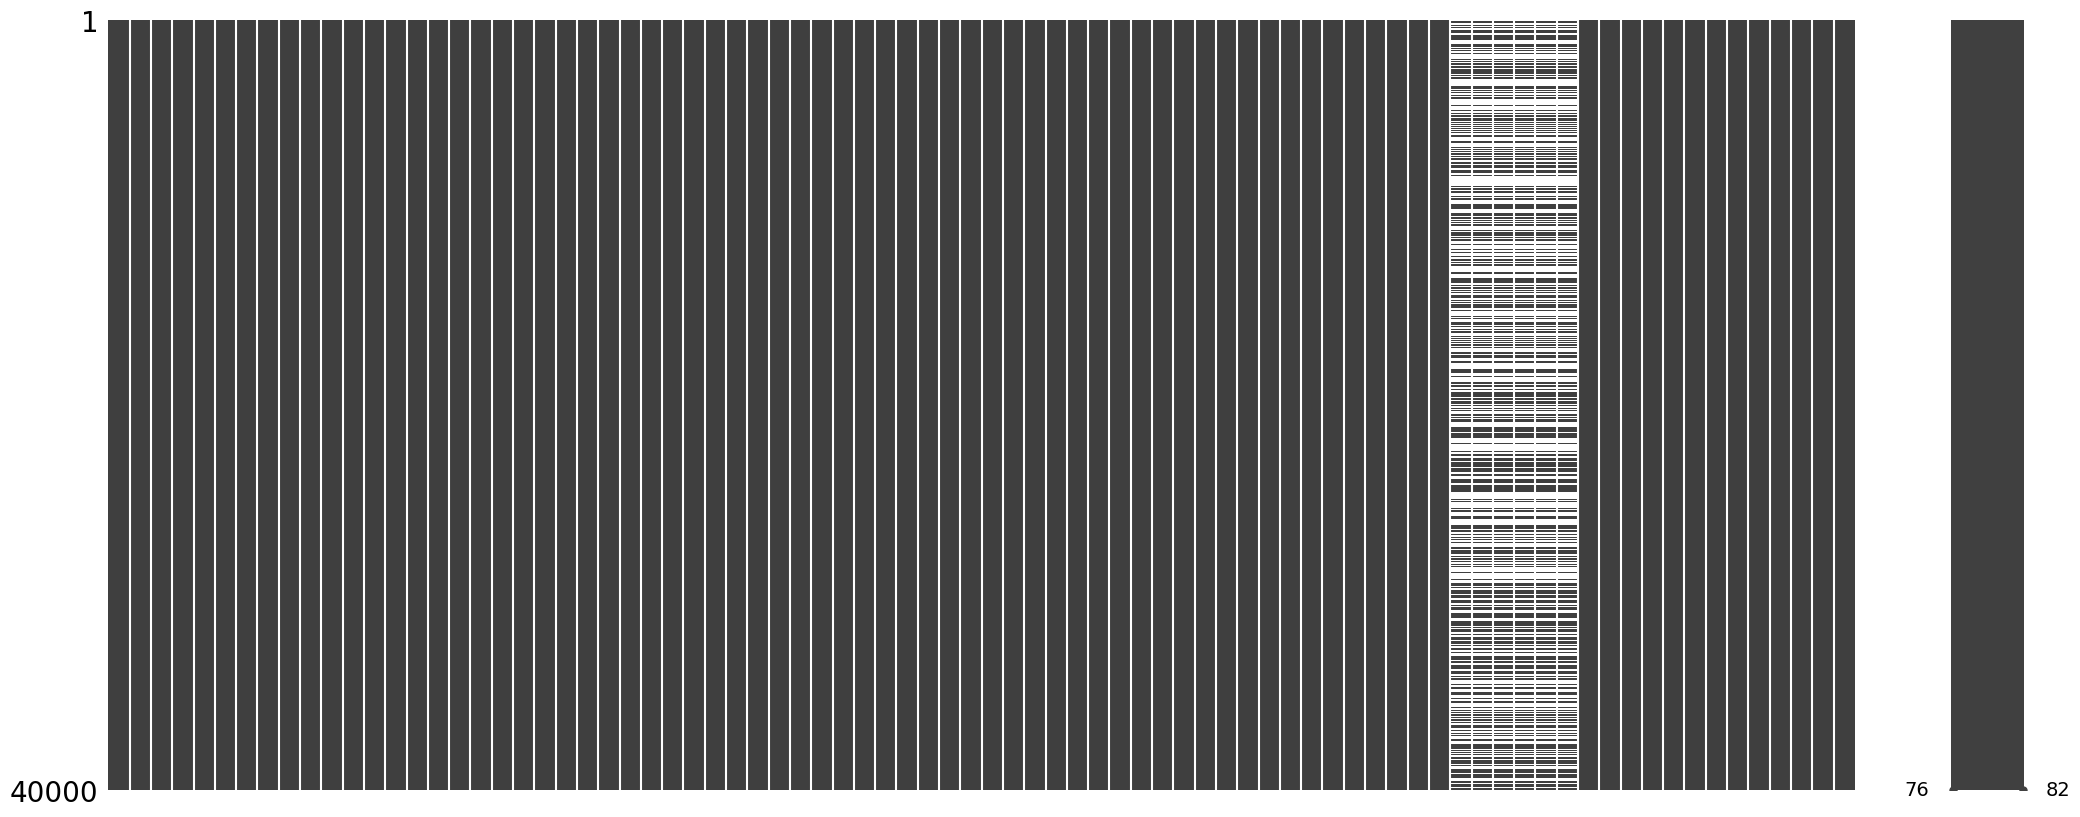

In [ ]:
import missingno as msno
msno.matrix(df)

<Axes: >

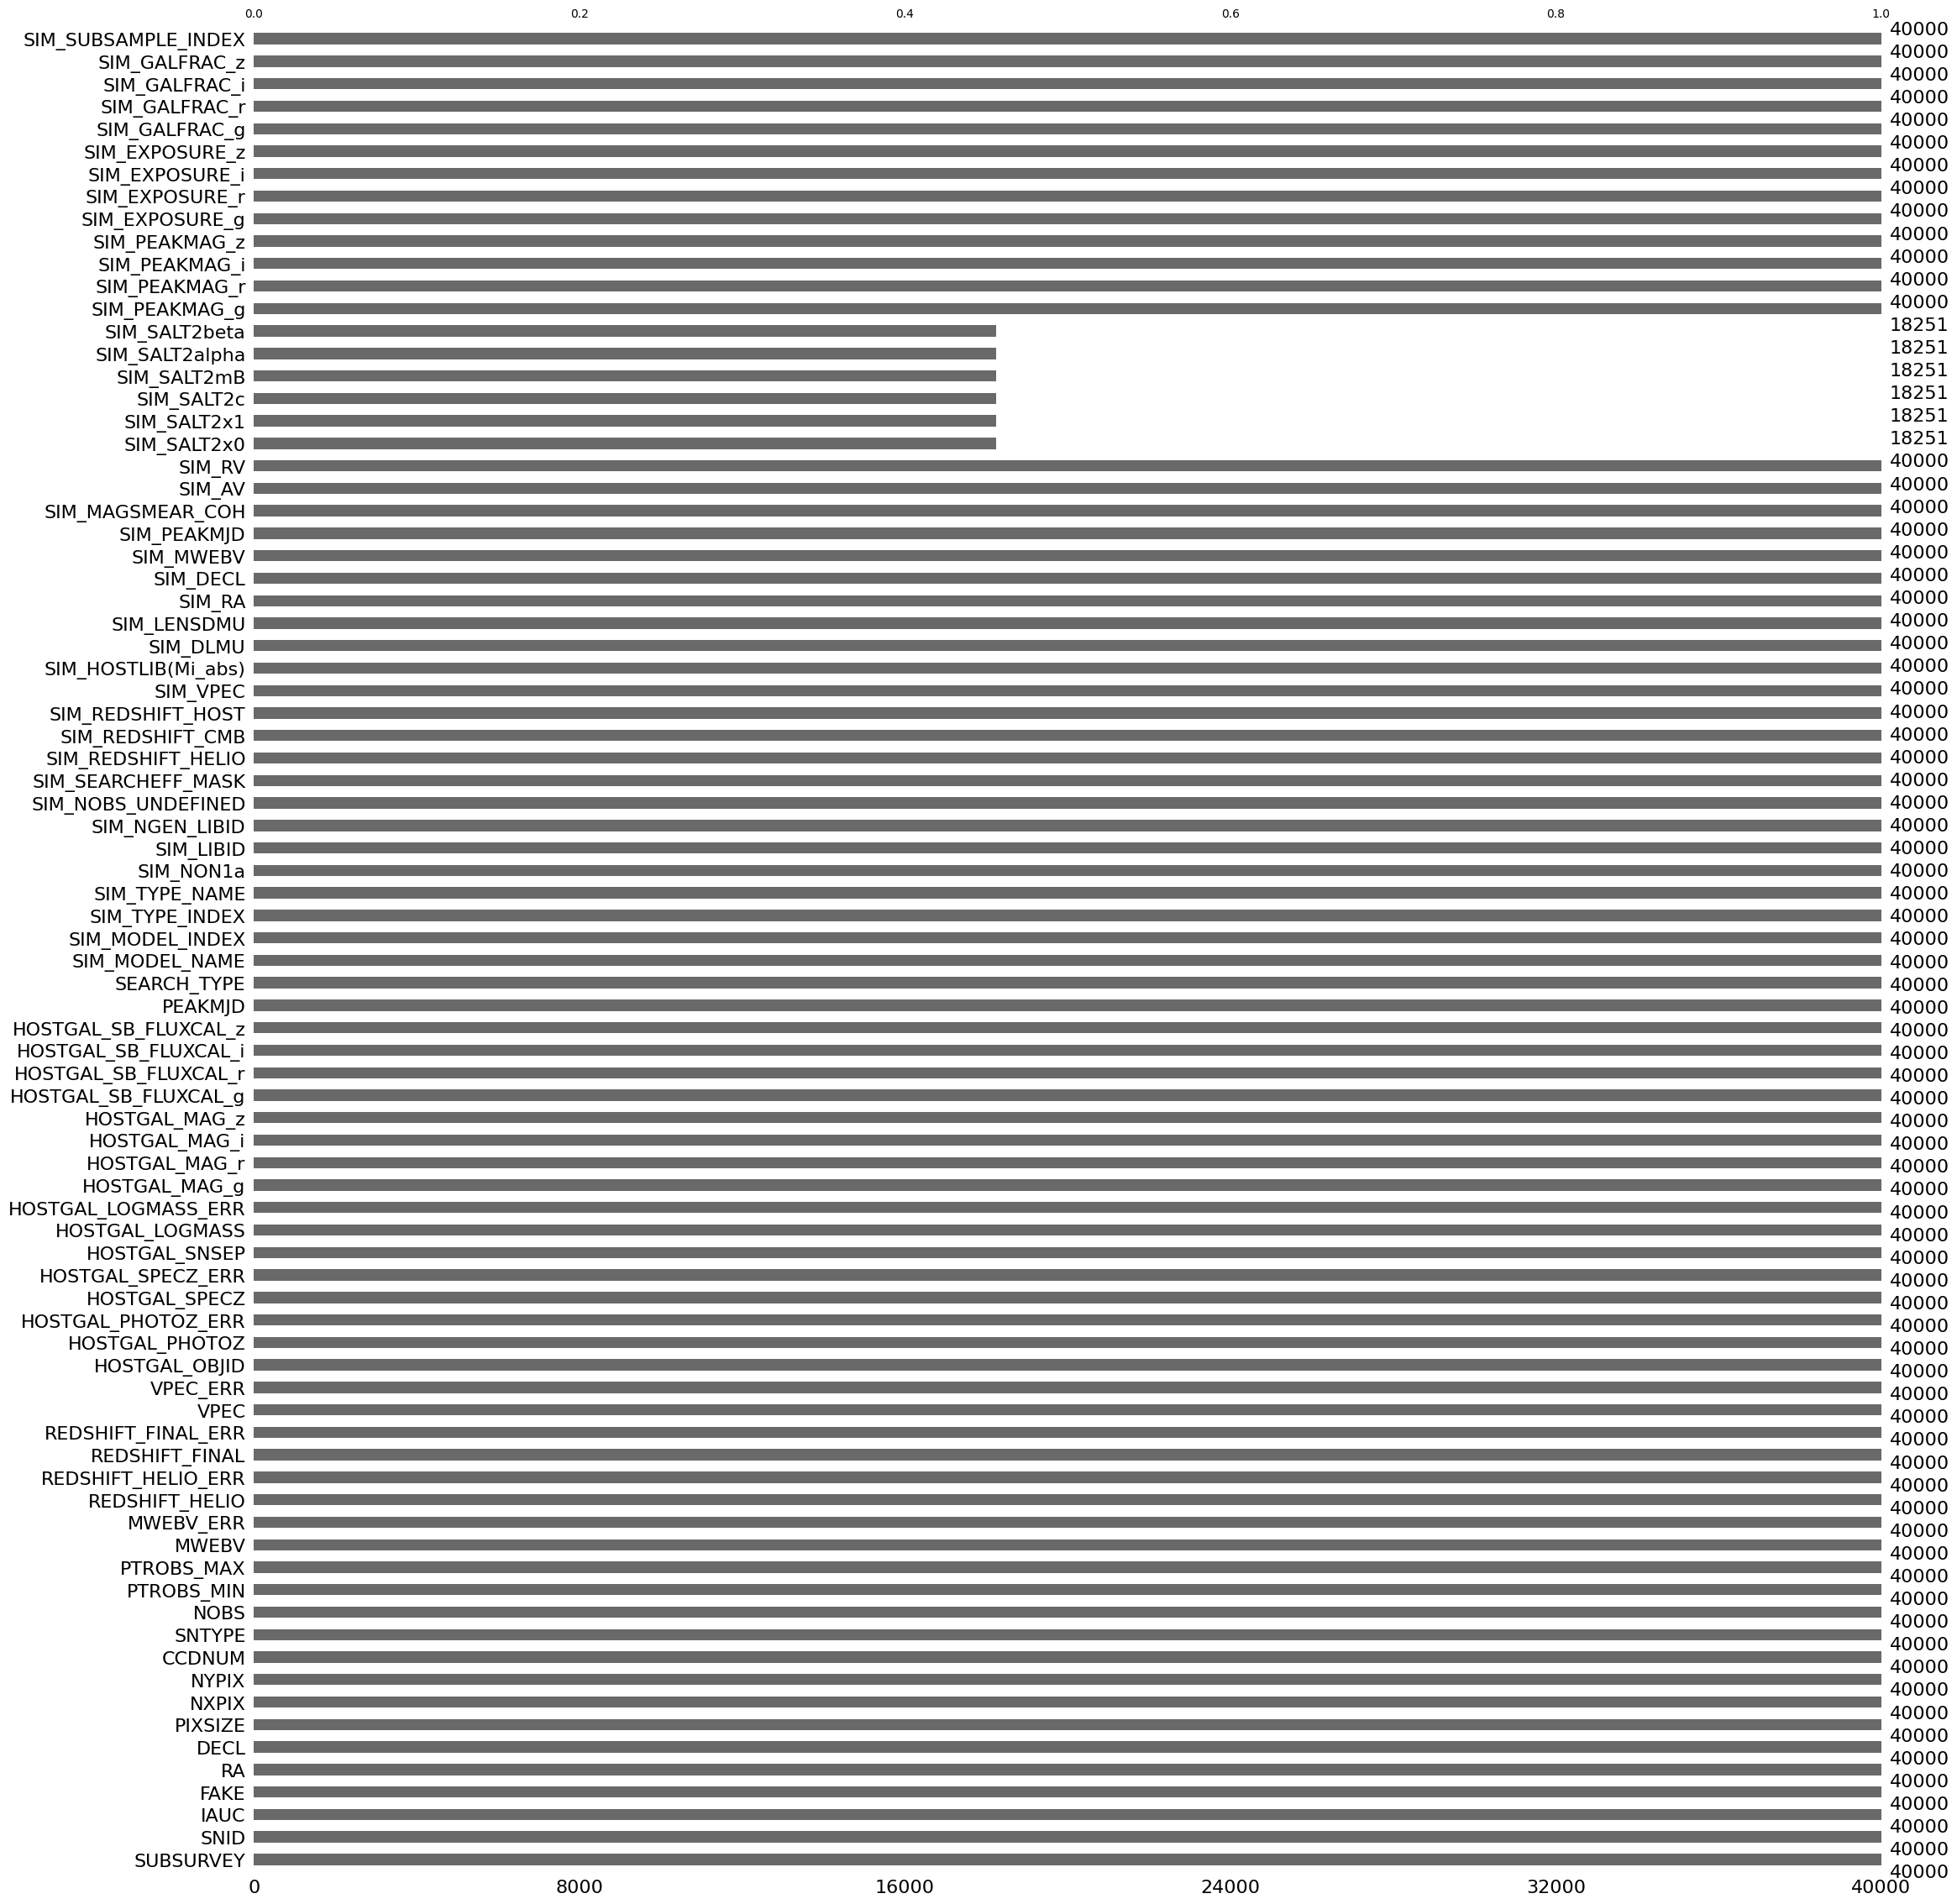

In [ ]:
msno.bar(df)

<Axes: >

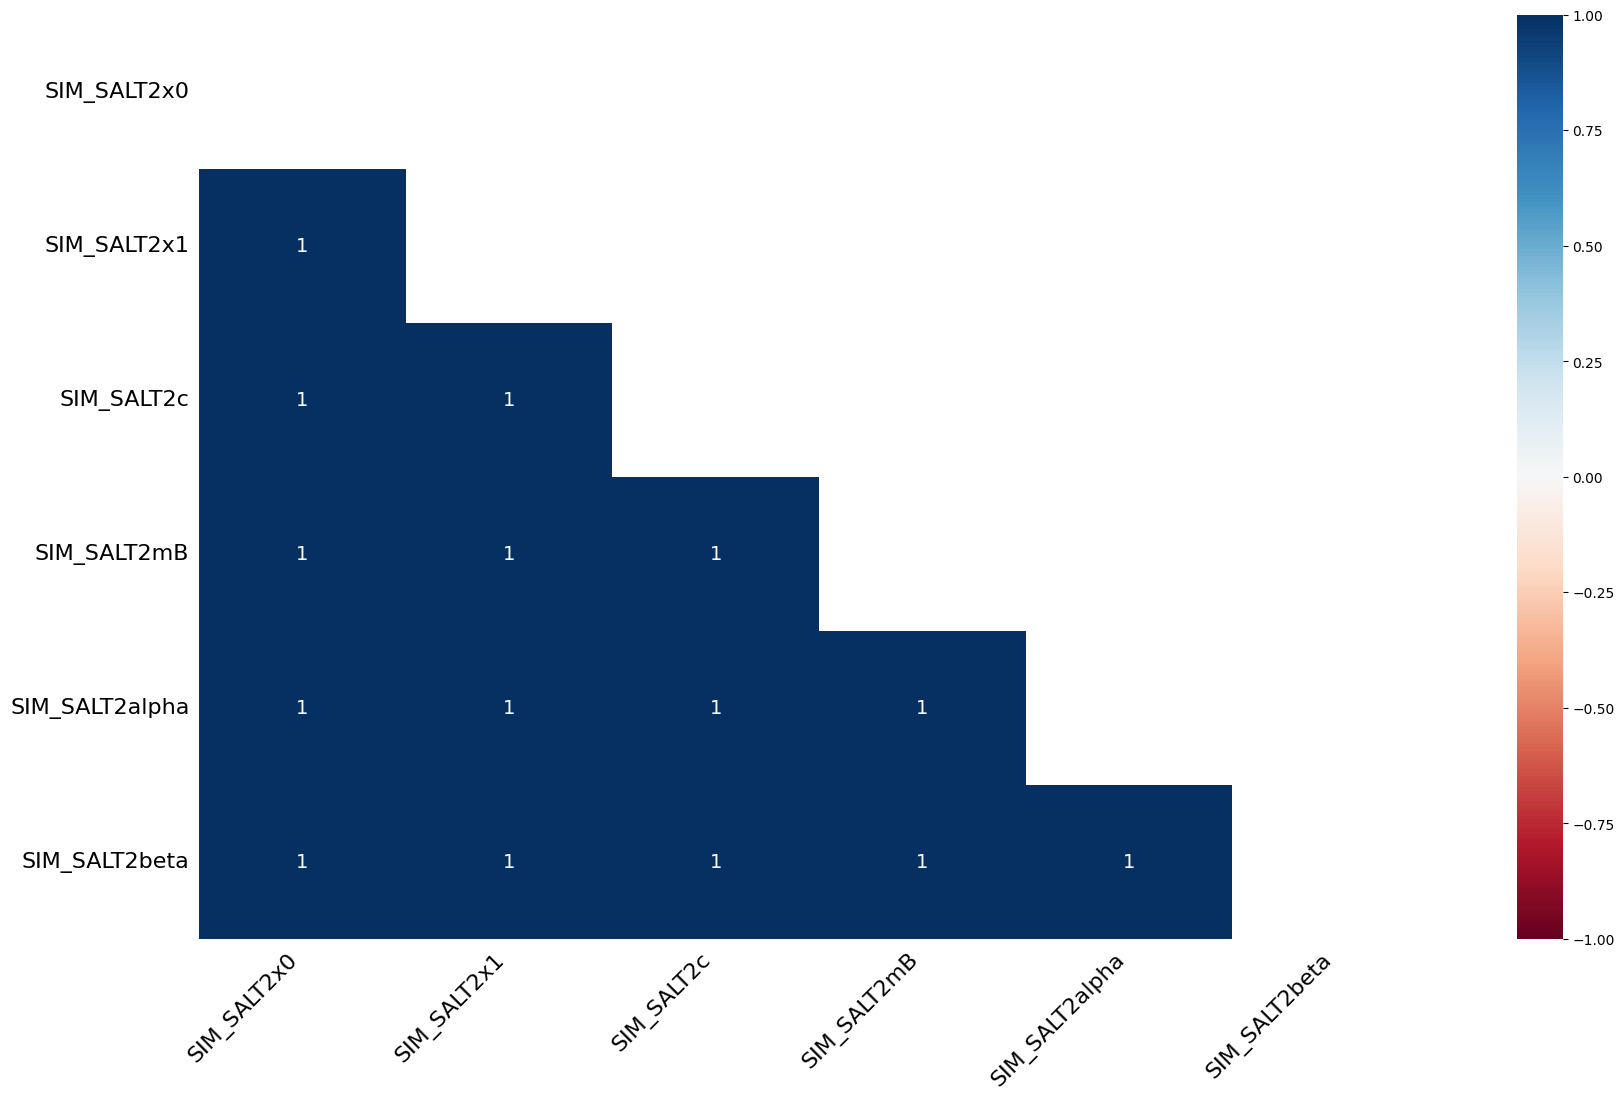

In [ ]:
msno.heatmap(df)

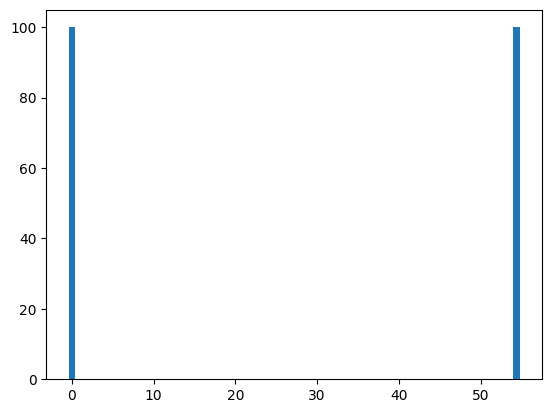

In [ ]:
null_values = df_feature.isnull().sum()/400
# df_feature.drop('NULL_PERCENTAGE %',axis =1,inplace = True)
plt.bar(null_values,height=100)
plt.show()

# DROPPING NULL VALUE COLUMNS

In [ ]:
non_unique = []
for i in df_feature.columns:
    if df_feature[i].nunique() == 1:
        non_unique.append(i)
    else:
        continue

print("Columns with only one unique value:")
for i in range(len(non_unique)):
    print(i + 1, "). ", non_unique[i],sep="")

df_drop = df_feature.drop(columns=non_unique)
df_drop.head()


Columns with only one unique value:
1). FAKE
2). PIXSIZE
3). NXPIX
4). NYPIX
5). VPEC
6). VPEC_ERR
7). HOSTGAL_LOGMASS
8). HOSTGAL_LOGMASS_ERR
9). SEARCH_TYPE
10). SIM_NGEN_LIBID
11). SIM_NOBS_UNDEFINED
12). SIM_VPEC
13). SIM_LENSDMU
14). SIM_AV
15). SIM_RV
16). SIM_SALT2alpha
17). SIM_SALT2beta
18). SIM_EXPOSURE_g
19). SIM_EXPOSURE_r
20). SIM_EXPOSURE_i
21). SIM_EXPOSURE_z
22). SIM_SUBSAMPLE_INDEX


SNID         RA       DECL  CCDNUM  NOBS  PTROBS_MIN  PTROBS_MAX  \
0  10473255  53.468451 -28.349424      44    61     1418390     1418450   
1   2110040  53.508185 -28.470810      50    69      713393      713461   
2   9966178  35.077432  -6.979272      51    65      802497      802561   
3  19732134  52.852204 -27.184372       3    34      111780      111813   
4   1582526  36.932302  -5.248342      55    65      230732      230796   

      MWEBV  MWEBV_ERR  REDSHIFT_HELIO  ...  SIM_SALT2c  SIM_SALT2mB  \
0  0.009902   0.001650        0.297897  ...         NaN          NaN   
1  0.006961   0.001160        1.101739  ...   -0.042911    25.165024   
2  0.024851   0.004142        0.497172  ...         NaN          NaN   
3  0.008636   0.001439        0.141762  ...         NaN          NaN   
4  0.025626   0.004271        0.468283  ...   -0.073272    22.592440   

   SIM_PEAKMAG_g  SIM_PEAKMAG_r  SIM_PEAKMAG_i  SIM_PEAKMAG_z  SIM_GALFRAC_g  \
0      25.321142      24.047743      23.709719      23.664705   2.378913e+00   
1      -9.000000      26.370707      24.971678      24.363064   3.254097e-14   
2      24.916900      23.966694      23.518854      23.319248   5.848331e-01   
3      22.514202      22.668192      22.609093      22.917084   4.299130e+00   
4      23.247778      22.357126      22.506872      22.626780   2.718171e-01   

   SIM_GALFRAC_r  SIM_GALFRAC_i  SIM_GALFRAC_z  
0       1.384469       1.228777       1.400711  
1       7.968017       3.885829       3.697690  
2       0.558739       0.499326       0.525232  
3      13.111013      19.559818      34.610160  
4       0.285706       0.416343       0.543132  

[5 rows x 55 columns]

# IMPUTATION

In [ ]:
df_imp = df_drop.copy()

# Columns to impute
columns_to_impute = ['SIM_SALT2x0', 'SIM_SALT2x1', 'SIM_SALT2c', 'SIM_SALT2mB']

# Impute missing values randomly
for column in columns_to_impute:
    # Get indices of missing values in the current column
    missing_indices = df_imp[column].isnull()

    # Count the number of missing values
    num_missing = missing_indices.sum()

    # Generate random values to fill missing values
    random_values = np.random.choice(df_imp[column].dropna(), size=num_missing)

    # Assign random values to missing values
    df_imp.loc[missing_indices, column] = random_values

# Now, df_imp will have missing values imputed randomly in the specified columns


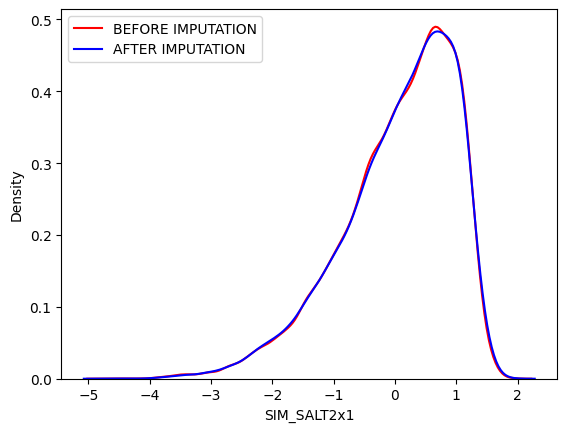

In [ ]:
sns.kdeplot(df_imp["SIM_SALT2x1"] , color="red" , label="BEFORE IMPUTATION")
sns.kdeplot(df_drop["SIM_SALT2x1"] , color="blue" , label="AFTER IMPUTATION")
plt.legend()
plt.show()

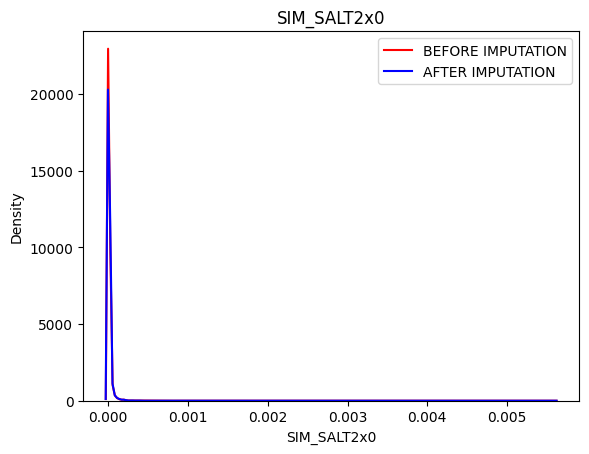

In [ ]:
sns.kdeplot(df_imp["SIM_SALT2x0"] , color="red" , label="BEFORE IMPUTATION")
sns.kdeplot(df_drop["SIM_SALT2x0"] , color="blue" , label="AFTER IMPUTATION")
plt.title("SIM_SALT2x0")
plt.legend()
plt.show()

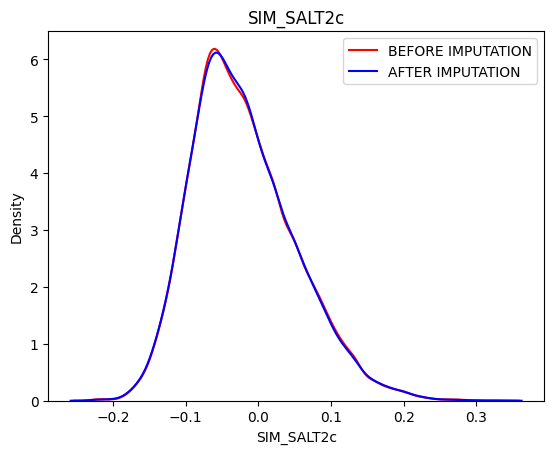

In [ ]:
sns.kdeplot(df_imp["SIM_SALT2c"] , color="red" , label="BEFORE IMPUTATION")
sns.kdeplot(df_drop["SIM_SALT2c"] , color="blue" , label="AFTER IMPUTATION")
plt.title("SIM_SALT2c")
plt.legend()
plt.show()

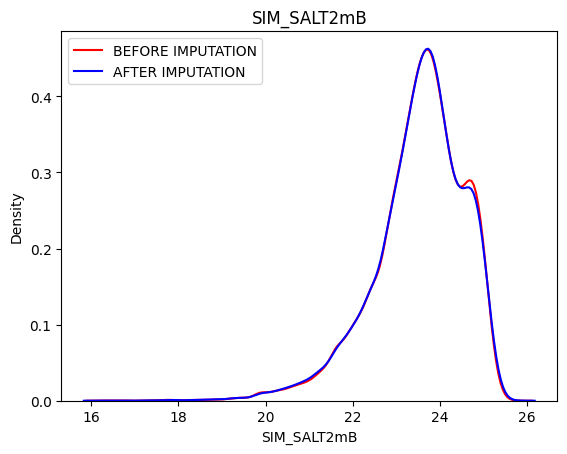

In [ ]:
sns.kdeplot(df_imp["SIM_SALT2mB"] , color="red" , label="BEFORE IMPUTATION")
sns.kdeplot(df_drop["SIM_SALT2mB"] , color="blue" , label="AFTER IMPUTATION")
plt.title("SIM_SALT2mB")
plt.legend()
plt.show()

In [ ]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SNID                  40000 non-null  int64  
 1   RA                    40000 non-null  float64
 2   DECL                  40000 non-null  float64
 3   CCDNUM                40000 non-null  int64  
 4   NOBS                  40000 non-null  int64  
 5   PTROBS_MIN            40000 non-null  int64  
 6   PTROBS_MAX            40000 non-null  int64  
 7   MWEBV                 40000 non-null  float64
 8   MWEBV_ERR             40000 non-null  float64
 9   REDSHIFT_HELIO        40000 non-null  float64
 10  REDSHIFT_HELIO_ERR    40000 non-null  float64
 11  REDSHIFT_FINAL        40000 non-null  float64
 12  REDSHIFT_FINAL_ERR    40000 non-null  float64
 13  HOSTGAL_OBJID         40000 non-null  int64  
 14  HOSTGAL_PHOTOZ        40000 non-null  float64
 15  HOSTGAL_PHOTOZ_ERR 

# Normalization

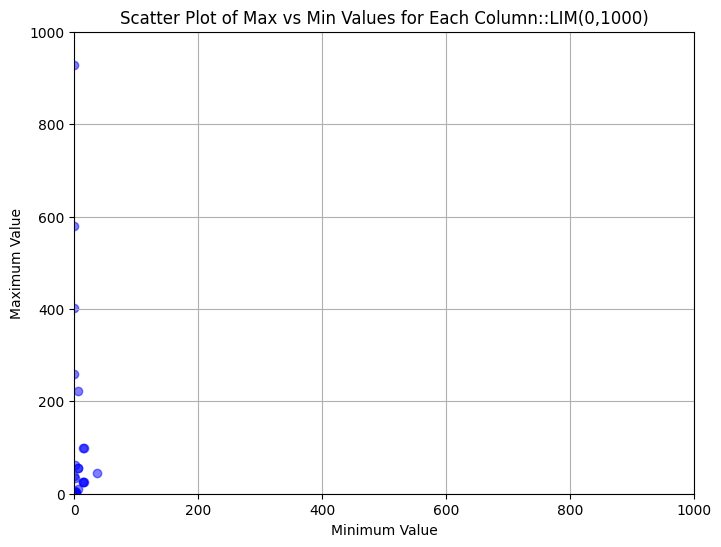

Number of points in the scatter plot: 77


In [ ]:
max_values = []
min_values = []

for column in df_feature.columns:
    # Compute maximum and minimum values for the current column
    max_val = df_feature[column].max()
    min_val = df_feature[column].min()

    # Append the maximum and minimum values to the respective lists
    max_values.append(max_val)
    min_values.append(min_val)

# Create a scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(min_values, max_values, color='blue', alpha=0.5)

plt.xlabel('Minimum Value')
plt.ylabel('Maximum Value')
plt.title('Scatter Plot of Max vs Min Values for Each Column::LIM(0,1000)')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.grid(True)

plt.show()

#No of points i.e. no of columns in df_imp
num_points = len(max_values)
print("Number of points in the scatter plot:", num_points)

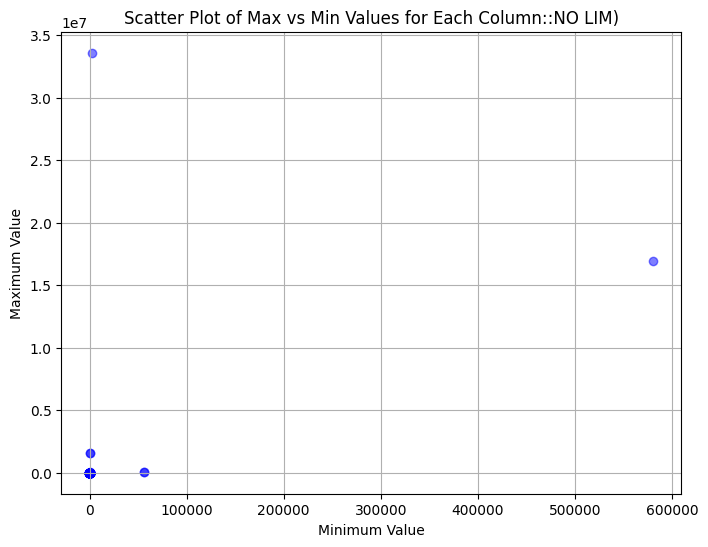

Number of points in the scatter plot: 77


In [ ]:
max_values = []
min_values = []

for column in df_feature.columns:
    # Compute maximum and minimum values for the current column
    max_val = df_feature[column].max()
    min_val = df_feature[column].min()

    # Append the maximum and minimum values to the respective lists
    max_values.append(max_val)
    min_values.append(min_val)

# Create a scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(min_values, max_values, color='blue', alpha=0.5)

plt.xlabel('Minimum Value')
plt.ylabel('Maximum Value')
plt.title('Scatter Plot of Max vs Min Values for Each Column::NO LIM)')
plt.grid(True)

plt.show()

#No of points i.e. no of columns in df_imp
num_points = len(max_values)
print("Number of points in the scatter plot:", num_points)

# CORRELATION MATRIX

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming df_imp is your DataFrame containing the data
# plt.figure(figsize=(30, 30))

# # Plot the heatmap
# sns.heatmap(df_imp , annot=True, cmap='coolwarm')

# plt.title('Correlation Heatmap of df_imp')
# plt.show()


In [ ]:
corr_matrix = df_imp.corr()
print(corr_matrix)


                          SNID        RA      DECL    CCDNUM      NOBS  \
SNID                  1.000000 -0.008677 -0.001440 -0.010272  0.002669   
RA                   -0.008677  1.000000  0.210762  0.020768 -0.024100   
DECL                 -0.001440  0.210762  1.000000 -0.039171 -0.184956   
CCDNUM               -0.010272  0.020768 -0.039171  1.000000 -0.008022   
NOBS                  0.002669 -0.024100 -0.184956 -0.008022  1.000000   
PTROBS_MIN           -0.005365  0.002529  0.008718  0.005464 -0.031798   
PTROBS_MAX           -0.005365  0.002527  0.008707  0.005464 -0.031741   
MWEBV                -0.001452  0.009156  0.789066  0.000239 -0.119584   
MWEBV_ERR            -0.001452  0.009156  0.789066  0.000239 -0.119584   
REDSHIFT_HELIO       -0.006584  0.126684 -0.001586  0.006106 -0.026973   
REDSHIFT_HELIO_ERR   -0.004222  0.101656  0.007043  0.010705 -0.019977   
REDSHIFT_FINAL       -0.006593  0.127548 -0.002278  0.006158 -0.026811   
REDSHIFT_FINAL_ERR   -0.004222  0.1016

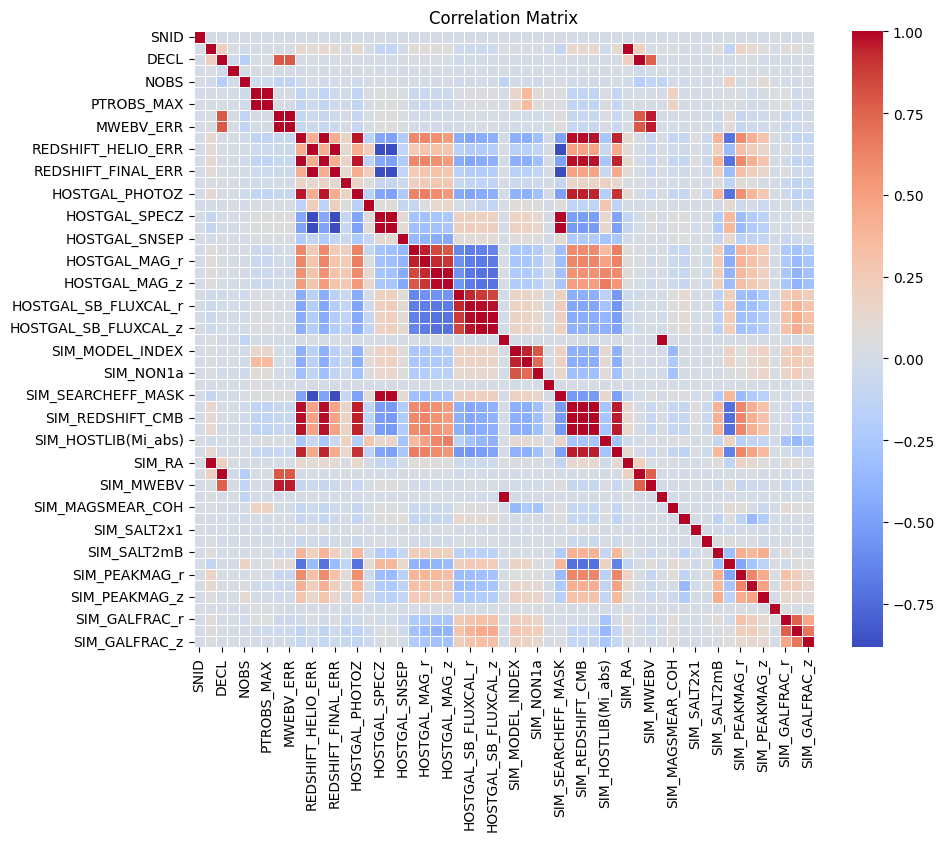

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool, LinearColorMapper, ColorBar
from bokeh.transform import transform

# Enable Bokeh to display in the notebook
output_notebook()


# Calculate correlation matrix
corr_matrix = df_imp.corr()

# Filter the correlation matrix based as corr less than 0.4 is barely correlated
mask = (corr_matrix > 0.4) | (corr_matrix < -0.4)
filtered_corr_matrix = corr_matrix[mask]

# Create a list of column names and row names
columns = filtered_corr_matrix.columns.tolist()
rows = filtered_corr_matrix.index.tolist()

# Create a 2D array of correlation values
values = []
for i in range(len(rows)):
    row_values = []
    for j in range(len(columns)):
        row_values.append(filtered_corr_matrix.iloc[i, j])
    values.append(row_values)

# Create a color mapper
color_mapper = LinearColorMapper(palette="Viridis256", low=-1, high=1)

# Create a figure
p = figure(title='Correlation Heatmap (|corr| > 0.4)', x_range=columns, y_range=list(reversed(rows)),
           x_axis_location="above", width=2000, height=2000,
           tools="hover")

# Plot heatmap
p.rect(x="columns", y="rows", width=1, height=1, source={'columns': columns * len(rows),
                                                         'rows': np.repeat(rows, len(columns)),
                                                         'values': np.array(values).flatten()},
       line_color=None, fill_color=transform('values', color_mapper))

# Add color bar
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Correlation')
p.add_layout(color_bar, 'right')

# Add hover tool
hover = HoverTool()
hover.tooltips = [("Columns", "@columns"), ("Rows", "@rows"), ("Correlation", "@values")]
p.add_tools(hover)

# Show the plot
show(p)


In [ ]:
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        corr_value = filtered_corr_matrix.loc[col1, col2]
        if np.isnan(corr_value) :
          continue
        else:
          print(f'Corr between {col1} and {col2} is: {corr_value:.2f}')
    print("-"*50)

--------------------------------------------------
Corr between RA and SIM_RA is: 1.00
--------------------------------------------------
Corr between DECL and MWEBV is: 0.79
Corr between DECL and MWEBV_ERR is: 0.79
Corr between DECL and SIM_DECL is: 1.00
Corr between DECL and SIM_MWEBV is: 0.76
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Corr between PTROBS_MIN and PTROBS_MAX is: 1.00
--------------------------------------------------
--------------------------------------------------
Corr between MWEBV and MWEBV_ERR is: 1.00
Corr between MWEBV and SIM_DECL is: 0.79
Corr between MWEBV and SIM_MWEBV is: 0.96
--------------------------------------------------
Corr between MWEBV_ERR and SIM_DECL is: 0.79
Corr between MWEBV_ERR and SIM_MWEBV is: 0.96
--------------------------------------------------
Corr between REDSHIFT_HELIO and REDSHIFT_HELIO_ERR is: 0.43
Corr between REDSHIFT_

# TOTAL FLUX CALCULATION

count    4.000000e+04
mean     2.900141e+03
std      1.973355e+04
min      3.772169e-63
25%      5.185215e+01
50%      1.905175e+02
75%      8.398224e+02
max      1.683844e+06
Name: TOTAL_FLUX, dtype: float64


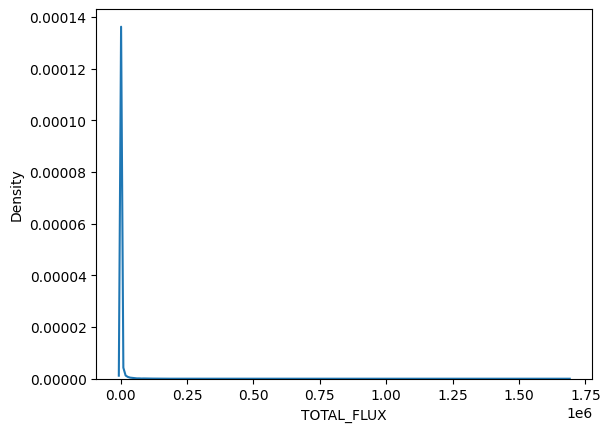

In [ ]:

df['TOTAL_FLUX'] = (df['HOSTGAL_SB_FLUXCAL_g']**2 + df['HOSTGAL_SB_FLUXCAL_r']**2 + df['HOSTGAL_SB_FLUXCAL_g']**2 + df['HOSTGAL_SB_FLUXCAL_g']**2)/4

print(df['TOTAL_FLUX'].describe())

sns.kdeplot(df['TOTAL_FLUX'])
plt.show()


# CARTESIAN COORDINATES

In [ ]:
import numpy as np

def ra_dec_to_cartesian(ra_deg, dec_deg):
    # Convert degrees to radians
    ra_rad = np.radians(ra_deg)
    dec_rad = np.radians(dec_deg)

    # Calculate Cartesian coordinates
    x = np.cos(dec_rad) * np.cos(ra_rad)
    y = np.cos(dec_rad) * np.sin(ra_rad)
    z = np.sin(dec_rad)

    return x, y, z

# Example usage
ra = 30.0  # Example Right Ascension in degrees
dec = 45.0  # Example Declination in degrees

x, y, z = ra_dec_to_cartesian(df_feature['RA'], df_feature['DECL'])
df['X-coordinate'] = x
df['Y-coordinate'] = y
df['Z-coordinate'] = z

p=df[['X-coordinate','Y-coordinate','Z-coordinate']]

p


X-coordinate  Y-coordinate  Z-coordinate
0          0.523874      0.707160     -0.474848
1          0.522784      0.706713     -0.476711
2          0.812312      0.570425     -0.121510
3          0.537170      0.709036     -0.456855
4          0.795995      0.598352     -0.091473
...             ...           ...           ...
39995      0.757270      0.652204     -0.034232
39996      0.543397      0.702739     -0.459213
39997      0.512379      0.722646     -0.463951
39998      0.531947      0.714005     -0.455225
39999      0.800899      0.586840     -0.119078

[40000 rows x 3 columns]

# ONE HOT ENCODING

In [ ]:
replace_dict = {101 : 'IA' , 120 : 'IIP' , 121 : 'IIN' , 122 : 'IIL1' , 123 : 'IIL2' , 132 : 'IB' , 133 : 'IC'}
df_hot = df_imp.copy()
df_hot["SNTYPE"]=df["SNTYPE"].replace(replace_dict)

In [ ]:
df_hot.head()

SNID         RA       DECL  CCDNUM  NOBS  PTROBS_MIN  PTROBS_MAX  \
0  10473255  53.468451 -28.349424      44    61     1418390     1418450   
1   2110040  53.508185 -28.470810      50    69      713393      713461   
2   9966178  35.077432  -6.979272      51    65      802497      802561   
3  19732134  52.852204 -27.184372       3    34      111780      111813   
4   1582526  36.932302  -5.248342      55    65      230732      230796   

      MWEBV  MWEBV_ERR  REDSHIFT_HELIO  ...  SIM_SALT2mB  SIM_PEAKMAG_g  \
0  0.009902   0.001650        0.297897  ...    21.984090      25.321142   
1  0.006961   0.001160        1.101739  ...    25.165024      -9.000000   
2  0.024851   0.004142        0.497172  ...    23.522713      24.916900   
3  0.008636   0.001439        0.141762  ...    24.227690      22.514202   
4  0.025626   0.004271        0.468283  ...    22.592440      23.247778   

   SIM_PEAKMAG_r  SIM_PEAKMAG_i  SIM_PEAKMAG_z  SIM_GALFRAC_g  SIM_GALFRAC_r  \
0      24.047743      23.709719      23.664705   2.378913e+00       1.384469   
1      26.370707      24.971678      24.363064   3.254097e-14       7.968017   
2      23.966694      23.518854      23.319248   5.848331e-01       0.558739   
3      22.668192      22.609093      22.917084   4.299130e+00      13.111013   
4      22.357126      22.506872      22.626780   2.718171e-01       0.285706   

   SIM_GALFRAC_i  SIM_GALFRAC_z  SNTYPE  
0       1.228777       1.400711      IC  
1       3.885829       3.697690      IA  
2       0.499326       0.525232    IIL1  
3      19.559818      34.610160     IIP  
4       0.416343       0.543132      IA  

[5 rows x 56 columns]

In [ ]:
Y=pd.DataFrame(df_hot["SNTYPE"] ,columns=["SNTYPE"])

In [ ]:
Y.head()

SNTYPE
0     IC
1     IA
2   IIL1
3    IIP
4     IA

In [ ]:
X = df_hot.drop("SNTYPE" , axis=1)
X

SNID         RA       DECL  CCDNUM  NOBS  PTROBS_MIN  PTROBS_MAX  \
0      10473255  53.468451 -28.349424      44    61     1418390     1418450   
1       2110040  53.508185 -28.470810      50    69      713393      713461   
2       9966178  35.077432  -6.979272      51    65      802497      802561   
3      19732134  52.852204 -27.184372       3    34      111780      111813   
4       1582526  36.932302  -5.248342      55    65      230732      230796   
...         ...        ...        ...     ...   ...         ...         ...   
39995  16005072  40.736879  -1.961712      60    46      337591      337636   
39996  32180995  52.286809 -27.336364       4    59      754632      754690   
39997   3508417  54.662131 -27.642363      54    32      644440      644471   
39998  16194817  53.313236 -27.079382      25     7      253404      253410   
39999  10816502  36.231246  -6.838880      49    82     1347913     1347994   

          MWEBV  MWEBV_ERR  REDSHIFT_HELIO  ...  SIM_SALT2c  SIM_SALT2mB  \
0      0.009902   0.001650        0.297897  ...   -0.039194    21.984090   
1      0.006961   0.001160        1.101739  ...   -0.042911    25.165024   
2      0.024851   0.004142        0.497172  ...   -0.101352    23.522713   
3      0.008636   0.001439        0.141762  ...   -0.157637    24.227690   
4      0.025626   0.004271        0.468283  ...   -0.073272    22.592440   
...         ...        ...             ...  ...         ...          ...   
39995  0.031219   0.005203        0.423820  ...   -0.064420    22.254797   
39996  0.007893   0.001316        0.676897  ...    0.037659    23.511213   
39997  0.010693   0.001782        0.793756  ...   -0.024480    24.385992   
39998  0.009418   0.001570        0.070448  ...   -0.002384    18.257221   
39999  0.033945   0.005658        0.715723  ...   -0.046295    24.203218   

       SIM_PEAKMAG_g  SIM_PEAKMAG_r  SIM_PEAKMAG_i  SIM_PEAKMAG_z  \
0          25.321142      24.047743      23.709719      23.664705   
1          -9.000000      26.370707      24.971678      24.363064   
2          24.916900      23.966694      23.518854      23.319248   
3          22.514202      22.668192      22.609093      22.917084   
4          23.247778      22.357126      22.506872      22.626780   
...              ...            ...            ...            ...   
39995      22.847624      22.064205      22.130280      22.403696   
39996      -9.000000      24.471960      24.720842      24.779268   
39997      -9.000000      23.296910      23.334276      23.454807   
39998      18.508059      18.538498      -9.000000      -9.000000   
39999      25.223606      23.609697      23.311010      23.339241   

       SIM_GALFRAC_g  SIM_GALFRAC_r  SIM_GALFRAC_i  SIM_GALFRAC_z  
0       2.378913e+00       1.384469   1.228777e+00   1.400711e+00  
1       3.254097e-14       7.968017   3.885829e+00   3.697690e+00  
2       5.848331e-01       0.558739   4.993262e-01   5.252323e-01  
3       4.299130e+00      13.111013   1.955982e+01   3.461016e+01  
4       2.718171e-01       0.285706   4.163428e-01   5.431316e-01  
...              ...            ...            ...            ...  
39995   2.884062e-01       0.663230   1.186423e+00   2.066639e+00  
39996   1.663175e-14       1.023620   2.192368e+00   2.528582e+00  
39997   8.707220e-15       0.335223   9.132640e-01   1.670266e+00  
39998   1.536111e-02       0.020247   2.152173e-13   2.263497e-13  
39999   9.105445e-01       0.957854   1.872260e+00   2.864212e+00  

[40000 rows x 55 columns]

In [ ]:
Y["SNTYPE"].unique()

array(['IC', 'IA', 'IIL1', 'IIP', 'IIN', 'IB', 'IIL2'], dtype=object)

In [ ]:
 # Initialize OneHotEncoder
encoder = OneHotEncoder()


# Fit and transform the 'SNTYPE' column
one_hot_encoded = encoder.fit_transform(Y[['SNTYPE']])

# Convert the encoded result to DataFrame
Y_hot = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['SNTYPE']))
Y_hot.head()

SNTYPE_IA  SNTYPE_IB  SNTYPE_IC  SNTYPE_IIL1  SNTYPE_IIL2  SNTYPE_IIN  \
0        0.0        0.0        1.0          0.0          0.0         0.0   
1        1.0        0.0        0.0          0.0          0.0         0.0   
2        0.0        0.0        0.0          1.0          0.0         0.0   
3        0.0        0.0        0.0          0.0          0.0         0.0   
4        1.0        0.0        0.0          0.0          0.0         0.0   

   SNTYPE_IIP  
0         0.0  
1         0.0  
2         0.0  
3         1.0  
4         0.0

In [ ]:
Y_temp = Y_hot["SNTYPE_IA"] +Y_hot["SNTYPE_IB"]*2+Y_hot["SNTYPE_IC"]*3+Y_hot["SNTYPE_IIL1"]*4 +Y_hot["SNTYPE_IIL2"]*5 +Y_hot["SNTYPE_IIN"]*6 +Y_hot["SNTYPE_IIP"]*7

In [ ]:
Y_use = pd.DataFrame(Y_temp)
Y_use

0
0      3.0
1      1.0
2      4.0
3      7.0
4      1.0
...    ...
39995  1.0
39996  6.0
39997  6.0
39998  1.0
39999  2.0

[40000 rows x 1 columns]

# RA AND DEC

---




In [ ]:
Y_hot.columns

Index(['SNTYPE_IA', 'SNTYPE_IB', 'SNTYPE_IC', 'SNTYPE_IIL1', 'SNTYPE_IIL2',
       'SNTYPE_IIN', 'SNTYPE_IIP'],
      dtype='object')

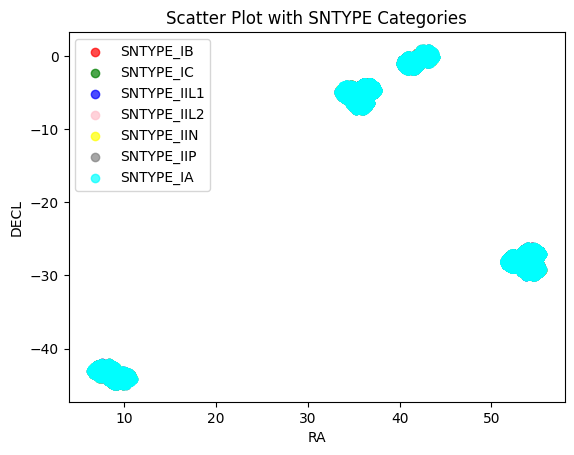

In [ ]:
df_plot = pd.concat([Y_hot , X],axis=1)
# Define colors for each 'SNTYPE' column
colors = {'SNTYPE_IB': 'red', 'SNTYPE_IC': 'green', 'SNTYPE_IIL1': 'blue',
          'SNTYPE_IIL2': 'pink', 'SNTYPE_IIN': 'yellow', 'SNTYPE_IIP': 'grey' ,"SNTYPE_IA":"cyan"}



# Scatter plot with different colors for each 'SNTYPE' column
for sntype, color in colors.items():
    plt.scatter(df_plot[df_plot[sntype] == 1]['RA'], df_plot[df_plot[sntype] == 1]['DECL'], c=color, label=sntype, alpha=0.7)

# Customize the plot
plt.xlabel('RA')
plt.ylabel('DECL')
plt.title('Scatter Plot with SNTYPE Categories')
plt.legend()

plt.show()

HERE WE CAN CLEARLY SEE THAT ALMOST ALL THE COORDINATES OF THE SUPERNOVAE ARE TOO CLOSE TOO EACH OTHER THEREFORE WE DROP THE COLUMN in future

# REDSHIFT_FINAL & Helio

In [ ]:

correlation = df['REDSHIFT_FINAL'].corr(df['REDSHIFT_HELIO'])
print("Correlation between REDSHIFT_FINAL and REDSHIFT_HELIO:", correlation)


Correlation between REDSHIFT_FINAL and REDSHIFT_HELIO: 0.9999991899705933


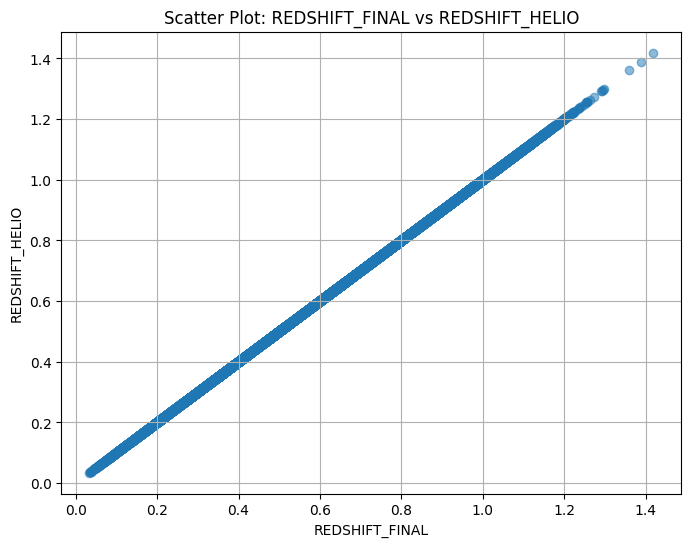

In [ ]:

plt.figure(figsize=(8, 6))  # Set the size of the plot

# Scatter plot
plt.scatter(df['REDSHIFT_FINAL'], df['REDSHIFT_HELIO'], alpha=0.5)

# Add labels and title
plt.xlabel('REDSHIFT_FINAL')
plt.ylabel('REDSHIFT_HELIO')
plt.title('Scatter Plot: REDSHIFT_FINAL vs REDSHIFT_HELIO')

# Show grid
plt.grid(True)

# Show plot
plt.show()


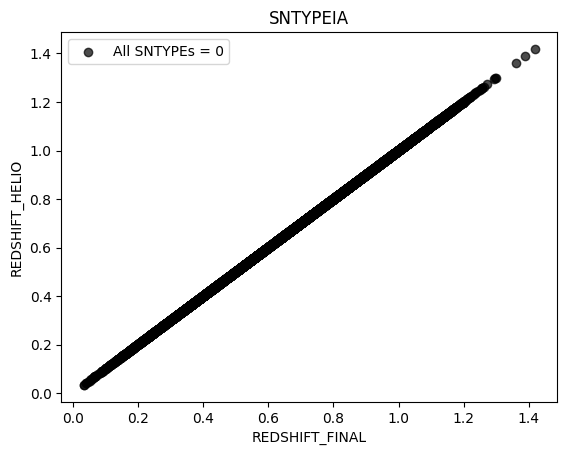

In [ ]:
zero_sn_types = df_plot[df_plot[['SNTYPE_IB', 'SNTYPE_IC', 'SNTYPE_IIL1', 'SNTYPE_IIL2', 'SNTYPE_IIN', 'SNTYPE_IIP']].sum(axis=1) == 0]

# Create a scatter plot with all 'SNTYPE' values zero
plt.scatter(zero_sn_types['REDSHIFT_FINAL'], zero_sn_types['REDSHIFT_HELIO'], c='black', label='All SNTYPEs = 0', alpha=0.7)

# Customize the plot
plt.xlabel('REDSHIFT_FINAL')
plt.ylabel('REDSHIFT_HELIO')
plt.title('SNTYPEIA')
plt.legend()
plt.show()

# Decision Tree

In [ ]:
X.columns

Index(['SNID', 'RA', 'DECL', 'CCDNUM', 'NOBS', 'PTROBS_MIN', 'PTROBS_MAX',
       'MWEBV', 'MWEBV_ERR', 'REDSHIFT_HELIO', 'REDSHIFT_HELIO_ERR',
       'REDSHIFT_FINAL', 'REDSHIFT_FINAL_ERR', 'HOSTGAL_OBJID',
       'HOSTGAL_PHOTOZ', 'HOSTGAL_PHOTOZ_ERR', 'HOSTGAL_SPECZ',
       'HOSTGAL_SPECZ_ERR', 'HOSTGAL_SNSEP', 'HOSTGAL_MAG_g', 'HOSTGAL_MAG_r',
       'HOSTGAL_MAG_i', 'HOSTGAL_MAG_z', 'HOSTGAL_SB_FLUXCAL_g',
       'HOSTGAL_SB_FLUXCAL_r', 'HOSTGAL_SB_FLUXCAL_i', 'HOSTGAL_SB_FLUXCAL_z',
       'PEAKMJD', 'SIM_MODEL_INDEX', 'SIM_TYPE_INDEX', 'SIM_NON1a',
       'SIM_LIBID', 'SIM_SEARCHEFF_MASK', 'SIM_REDSHIFT_HELIO',
       'SIM_REDSHIFT_CMB', 'SIM_REDSHIFT_HOST', 'SIM_HOSTLIB(Mi_abs)',
       'SIM_DLMU', 'SIM_RA', 'SIM_DECL', 'SIM_MWEBV', 'SIM_PEAKMJD',
       'SIM_MAGSMEAR_COH', 'SIM_SALT2x0', 'SIM_SALT2x1', 'SIM_SALT2c',
       'SIM_SALT2mB', 'SIM_PEAKMAG_g', 'SIM_PEAKMAG_r', 'SIM_PEAKMAG_i',
       'SIM_PEAKMAG_z', 'SIM_GALFRAC_g', 'SIM_GALFRAC_r', 'SIM_GALFRAC_i',
       'SIM_GA

Since PTROBS_MAX and PTROBS_MIN have a very high correlation therefore creating a new column PTROBS_MEAN out of the them.


In [ ]:
X['PTROBS_MEAN'] = (X['PTROBS_MAX'] + X['PTROBS_MIN']) / 2


Calculating train & test Accuracy and cv score of our Decision Trees Model

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_use = X[['SNID', 'RA', 'DECL', 'CCDNUM', 'NOBS','PTROBS_MAX',
       'MWEBV', 'MWEBV_ERR', 'REDSHIFT_HELIO', 'REDSHIFT_HELIO_ERR',
       'REDSHIFT_FINAL', 'REDSHIFT_FINAL_ERR', 'HOSTGAL_OBJID',
       'HOSTGAL_PHOTOZ', 'HOSTGAL_PHOTOZ_ERR', 'HOSTGAL_SPECZ',
       'HOSTGAL_SPECZ_ERR', 'HOSTGAL_SNSEP', 'HOSTGAL_MAG_g', 'HOSTGAL_MAG_r',
       'HOSTGAL_MAG_i', 'HOSTGAL_MAG_z', 'HOSTGAL_SB_FLUXCAL_g',
       'HOSTGAL_SB_FLUXCAL_r', 'HOSTGAL_SB_FLUXCAL_i', 'HOSTGAL_SB_FLUXCAL_z',
       'PEAKMJD','SIM_MAGSMEAR_COH','SIM_SEARCHEFF_MASK', 'SIM_REDSHIFT_HELIO',
       'SIM_REDSHIFT_CMB', 'SIM_REDSHIFT_HOST', 'SIM_HOSTLIB(Mi_abs)',
       'SIM_DLMU', 'SIM_RA', 'SIM_DECL', 'SIM_MWEBV', 'SIM_PEAKMJD',
        'SIM_SALT2x0', 'SIM_SALT2x1', 'SIM_SALT2c',
       'SIM_SALT2mB', 'SIM_PEAKMAG_g', 'SIM_PEAKMAG_r', 'SIM_PEAKMAG_i',
       'SIM_PEAKMAG_z', 'SIM_GALFRAC_g', 'SIM_GALFRAC_r', 'SIM_GALFRAC_i',
       'SIM_GALFRAC_z']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_use, Y_hot , test_size=0.4 , random_state=42)

# Create Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the training data
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the testing data
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate cross-validation scores
cv_scores = cross_val_score(clf, X_use, Y_hot , cv=5)

print("Accuracy on training data:", train_accuracy)
print("Accuracy on test data:", test_accuracy)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Accuracy on training data: 1.0
Accuracy on test data: 0.98875
Cross-validation scores: [0.990875 0.991625 0.9885   0.988375 0.9905  ]
Mean cross-validation score: 0.989975


calculating feature importance in the model

In [ ]:
# Sort feature importances and feature names in increasing order
sorted_features = sorted(zip(clf.feature_importances_, X_use.columns))

# Print feature names and importances in increasing order
for importance, name in sorted_features:
    print(name, importance)
lt=[]
for importance, name in sorted_features:
  if importance > 0.01 :

    lt.append(name)
  else :
    continue
lt

HOSTGAL_MAG_g 0.0
HOSTGAL_MAG_i 0.0
HOSTGAL_MAG_z 0.0
HOSTGAL_PHOTOZ_ERR 0.0
HOSTGAL_SB_FLUXCAL_i 0.0
MWEBV_ERR 0.0
REDSHIFT_HELIO_ERR 0.0
SIM_SEARCHEFF_MASK 0.0
SIM_DECL 5.704297652076859e-05
CCDNUM 7.605730202769147e-05
HOSTGAL_SPECZ_ERR 8.556446478115289e-05
PEAKMJD 0.00010267735773738352
HOSTGAL_MAG_r 0.00011265551326375746
HOSTGAL_OBJID 0.00011397310837977365
RA 0.00012565043250700123
REDSHIFT_FINAL 0.00014382182369268378
DECL 0.00014655657044566707
HOSTGAL_SB_FLUXCAL_r 0.00017112892956230578
NOBS 0.00017325185755750987
REDSHIFT_FINAL_ERR 0.00019505872311823195
SIM_MWEBV 0.00020229266825027556
SIM_SALT2x1 0.00021983003754923766
SNID 0.00022465107164710367
MWEBV 0.00024338336648861266
SIM_RA 0.0002535243400923049
HOSTGAL_SB_FLUXCAL_z 0.00036127218463153445
HOSTGAL_SB_FLUXCAL_g 0.0004010294106914641
SIM_PEAKMJD 0.00041353777715652653
REDSHIFT_HELIO 0.00044165835581596024
HOSTGAL_PHOTOZ 0.0007374280747331057
HOSTGAL_SNSEP 0.0008665909429513662
SIM_REDSHIFT_CMB 0.0009439254448079567
S

['SIM_SALT2mB',
 'SIM_PEAKMAG_r',
 'SIM_GALFRAC_i',
 'SIM_DLMU',
 'SIM_PEAKMAG_z',
 'SIM_PEAKMAG_i',
 'SIM_REDSHIFT_HOST',
 'SIM_SALT2x0',
 'SIM_REDSHIFT_HELIO',
 'SIM_MAGSMEAR_COH',
 'PTROBS_MAX']

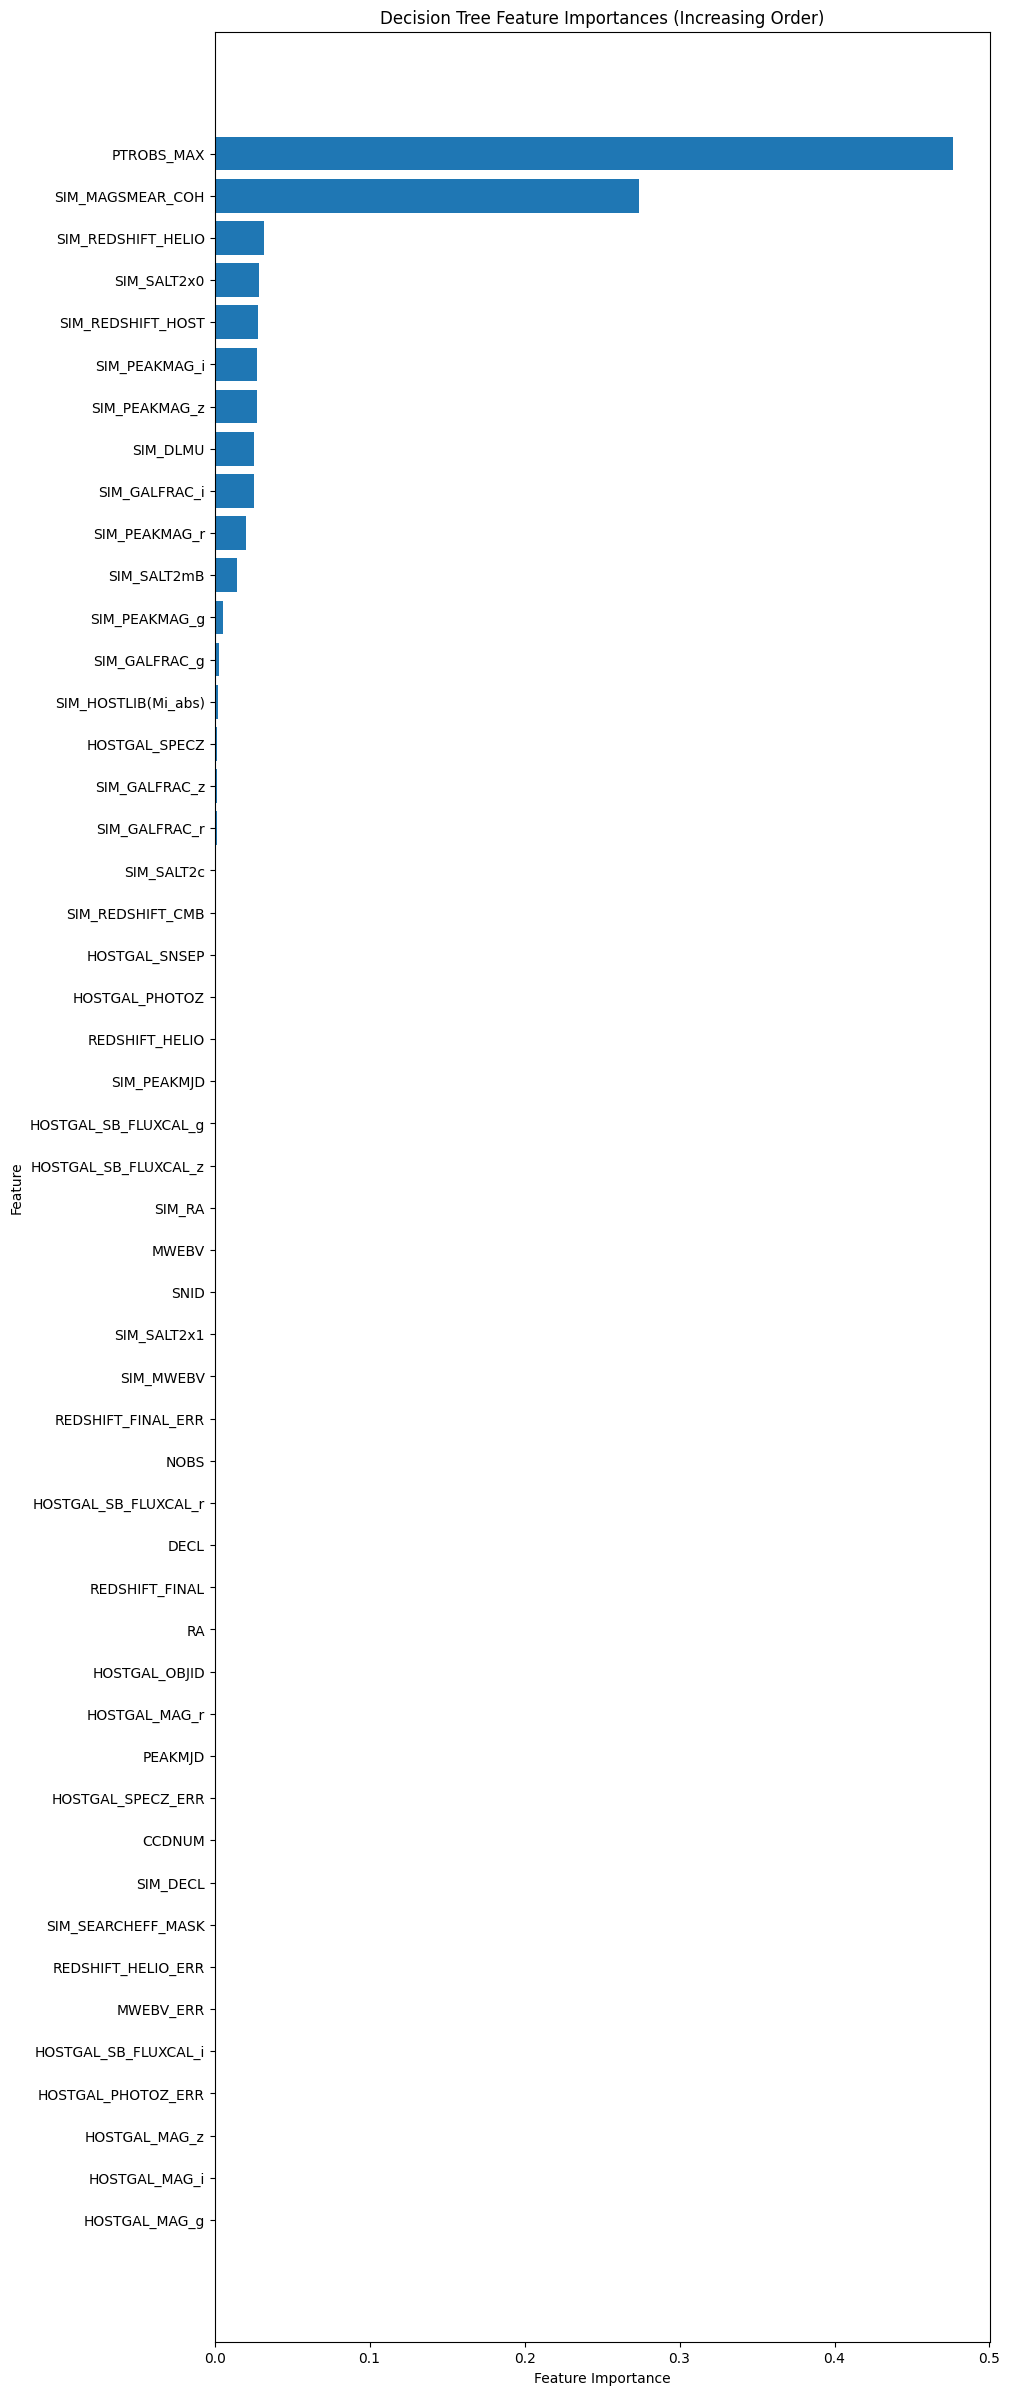

In [ ]:


# Sort feature importances and feature names in increasing order
sorted_features = sorted(zip(clf.feature_importances_, X_use.columns))

# Extract sorted feature importances and names
sorted_importances = [importance for importance, _ in sorted_features]
sorted_names = [name for _, name in sorted_features]

# Plot feature importances in increasing order
plt.figure(figsize=(10, 30))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances (Increasing Order)')
plt.show()



plotting occurence of each class in the dataset

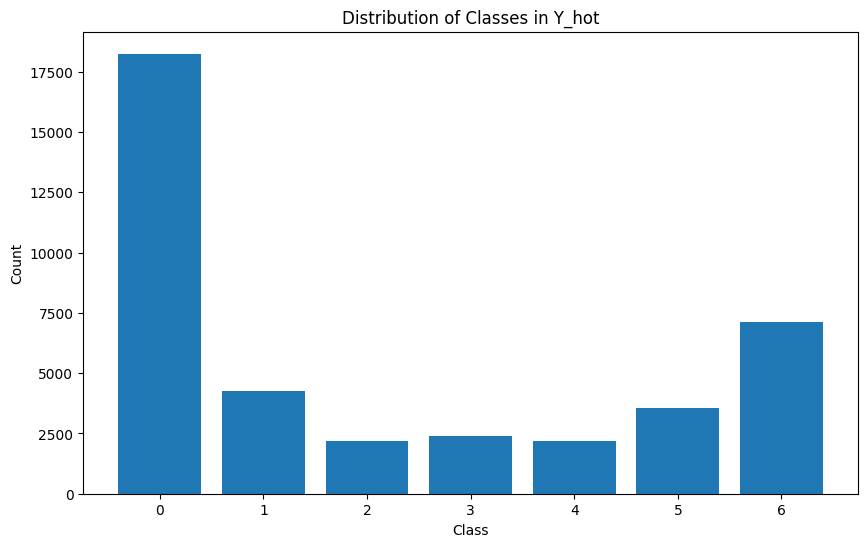

In [ ]:

# Count occurrences of each class in Y_hot
class_counts = np.sum(Y_hot, axis=0)

# Get class labels
class_labels = range(Y_hot.shape[1])

# Plot bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Y_hot')
plt.xticks(class_labels)  # Set x-axis ticks to class labels
plt.show()

Accuracy on the basis of most important features

['SIM_SALT2mB', 'SIM_PEAKMAG_r', 'SIM_GALFRAC_i', 'SIM_DLMU', 'SIM_PEAKMAG_z', 'SIM_PEAKMAG_i', 'SIM_REDSHIFT_HOST', 'SIM_SALT2x0', 'SIM_REDSHIFT_HELIO', 'SIM_MAGSMEAR_COH', 'PTROBS_MAX']
Index(['SIM_SALT2mB', 'SIM_DLMU', 'SIM_PEAKMAG_z', 'SIM_PEAKMAG_i',
       'SIM_SALT2x0', 'SIM_MAGSMEAR_COH', 'PTROBS_MAX', 'SIM_REDSHIFT'],
      dtype='object')
Accuracy on training data: 1.0
Accuracy on test data: 0.99025
Cross-validation scores: [0.994625 0.99175  0.992875 0.99375  0.993125]
Mean cross-validation score: 0.993225


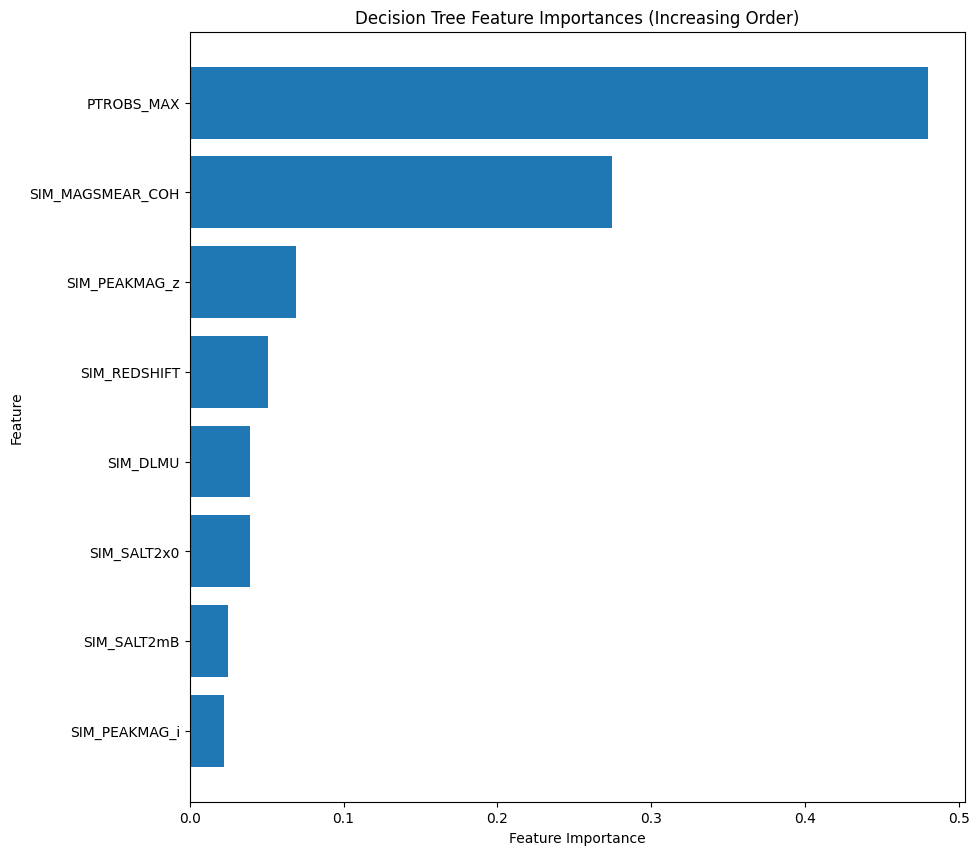

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
print(lt)
X_use1 = X[lt].drop(columns=['SIM_REDSHIFT_HOST','SIM_REDSHIFT_HELIO', 'SIM_PEAKMAG_r', 'SIM_GALFRAC_i'])
X_use1["SIM_REDSHIFT"]=(X['SIM_REDSHIFT_HELIO']+X['SIM_REDSHIFT_HOST'])/2
print(X_use1.columns)
# Split the data into training and testing sets
X_train1 , X_test1, y_train1, y_test1 = train_test_split(X_use1 , Y_hot , test_size=0.4 , random_state=42)

# Create Decision Tree classifier
dclf = DecisionTreeClassifier()

# Train the classifier
dclf.fit(X_train1, y_train1)

# Predict on the training data
y_train_pred1 = dclf.predict(X_train1)
train_accuracy = accuracy_score(y_train1, y_train_pred1)

# Predict on the testing data
y_test_pred1= dclf.predict(X_test1)
test_accuracy = accuracy_score(y_test1, y_test_pred1)

# Calculate cross-validation scores
cv_scores = cross_val_score(dclf, X_use1 , Y_hot , cv=5)

print("Accuracy on training data:", train_accuracy)
print("Accuracy on test data:", test_accuracy)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Sort feature importances and feature names in increasing order
sorted_features = sorted(zip(dclf.feature_importances_, X_use1.columns))

# Extract sorted feature importances and names
sorted_importances = [importance for importance, _ in sorted_features]
sorted_names = [name for _, name in sorted_features]

# Plot feature importances in increasing order
plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances (Increasing Order)')
plt.show()




by removing the non important features the accuracy and cv score remians almost same in addition to decreasing the computation.

In [ ]:
 X_use.iloc[:,-2]

0        1.228777e+00
1        3.885829e+00
2        4.993262e-01
3        1.955982e+01
4        4.163428e-01
             ...     
39995    1.186423e+00
39996    2.192368e+00
39997    9.132640e-01
39998    2.152173e-13
39999    1.872260e+00
Name: SIM_GALFRAC_i, Length: 40000, dtype: float64

In [ ]:
Y_RESULT = pd.DataFrame(y_test_pred1, columns=['SNTYPE_IA', 'SNTYPE_IB', 'SNTYPE_IC', 'SNTYPE_IIL1', 'SNTYPE_IIL2',
       'SNTYPE_IIN', 'SNTYPE_IIP'])

In [ ]:
y_test1.columns

Index(['SNTYPE_IA', 'SNTYPE_IB', 'SNTYPE_IC', 'SNTYPE_IIL1', 'SNTYPE_IIL2',
       'SNTYPE_IIN', 'SNTYPE_IIP'],
      dtype='object')

In [ ]:
from sklearn.metrics import confusion_matrix
for _ in ['SNTYPE_IA', 'SNTYPE_IB', 'SNTYPE_IC', 'SNTYPE_IIL1', 'SNTYPE_IIL2',
       'SNTYPE_IIN', 'SNTYPE_IIP']:
       # Assuming y_true are the true labels and y_pred are the predicted labels
    conf_matrix = confusion_matrix(y_test1[_], Y_RESULT[_])

    print("Confusion Matrix",_)
    print(conf_matrix)

Confusion Matrix SNTYPE_IA
[[8651   76]
 [  63 7210]]
Confusion Matrix SNTYPE_IB
[[14236    13]
 [   29  1722]]
Confusion Matrix SNTYPE_IC
[[15118     0]
 [    1   881]]
Confusion Matrix SNTYPE_IIL1
[[15021    18]
 [   20   941]]
Confusion Matrix SNTYPE_IIL2
[[15149     0]
 [    3   848]]
Confusion Matrix SNTYPE_IIN
[[14577    14]
 [   17  1392]]
Confusion Matrix SNTYPE_IIP
[[13092    35]
 [   23  2850]]


In [ ]:
# Flatten the true labels and predicted labels
y_true_flat = np.argmax(y_test1.values, axis=1)
y_pred_flat = np.argmax(Y_RESULT.values, axis=1)
labels = ['SNTYPE_IA', 'SNTYPE_IB', 'SNTYPE_IC', 'SNTYPE_IIL1', 'SNTYPE_IIL2',
       'SNTYPE_IIN', 'SNTYPE_IIP']

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_flat, y_pred_flat)
print(conf_matrix)


[[7210   12    0   13    0    9   29]
 [  29 1722    0    0    0    0    0]
 [   0    1  881    0    0    0    0]
 [  18    0    0  941    0    1    1]
 [   1    0    0    1  848    1    0]
 [   9    0    0    3    0 1392    5]
 [  19    0    0    1    0    3 2850]]


<Axes: >

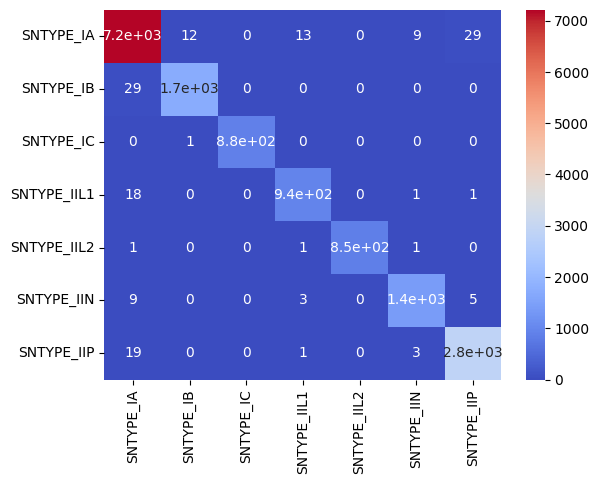

In [ ]:
sns.heatmap(conf_matrix , annot=True ,cmap="coolwarm", xticklabels=labels, yticklabels=labels)

In [ ]:
from sklearn.metrics import f1_score

f1_scores = f1_score(y_test1 , Y_RESULT, average=None)

overall_f1_score = f1_score(y_test1, Y_RESULT, average='weighted')

# Print F1 score for each class
for i, f1 in enumerate(f1_scores):
    print(f"F1 Score for class {i}: {f1}")

# Print overall F1 score
print("Overall F1 Score:", overall_f1_score)

F1 Score for class 0: 0.990452640978089
F1 Score for class 1: 0.9879518072289156
F1 Score for class 2: 0.9994327850255247
F1 Score for class 3: 0.9802083333333333
F1 Score for class 4: 0.998234255444379
F1 Score for class 5: 0.98898756660746
F1 Score for class 6: 0.9899270580062522
Overall F1 Score: 0.9902491792126474


In [ ]:
Y_RESULT

SNTYPE_IA  SNTYPE_IB  SNTYPE_IC  SNTYPE_IIL1  SNTYPE_IIL2  SNTYPE_IIN  \
0            0.0        0.0        0.0          0.0          0.0         0.0   
1            1.0        0.0        0.0          0.0          0.0         0.0   
2            0.0        1.0        0.0          0.0          0.0         0.0   
3            0.0        0.0        0.0          0.0          1.0         0.0   
4            0.0        0.0        0.0          0.0          0.0         0.0   
...          ...        ...        ...          ...          ...         ...   
15995        1.0        0.0        0.0          0.0          0.0         0.0   
15996        0.0        0.0        0.0          0.0          0.0         0.0   
15997        0.0        0.0        0.0          0.0          0.0         1.0   
15998        0.0        0.0        0.0          0.0          0.0         0.0   
15999        0.0        0.0        0.0          0.0          0.0         0.0   

       SNTYPE_IIP  
0             1.0  
1             0.0  
2             0.0  
3             0.0  
4             1.0  
...           ...  
15995         0.0  
15996         1.0  
15997         0.0  
15998         1.0  
15999         1.0  

[16000 rows x 7 columns]

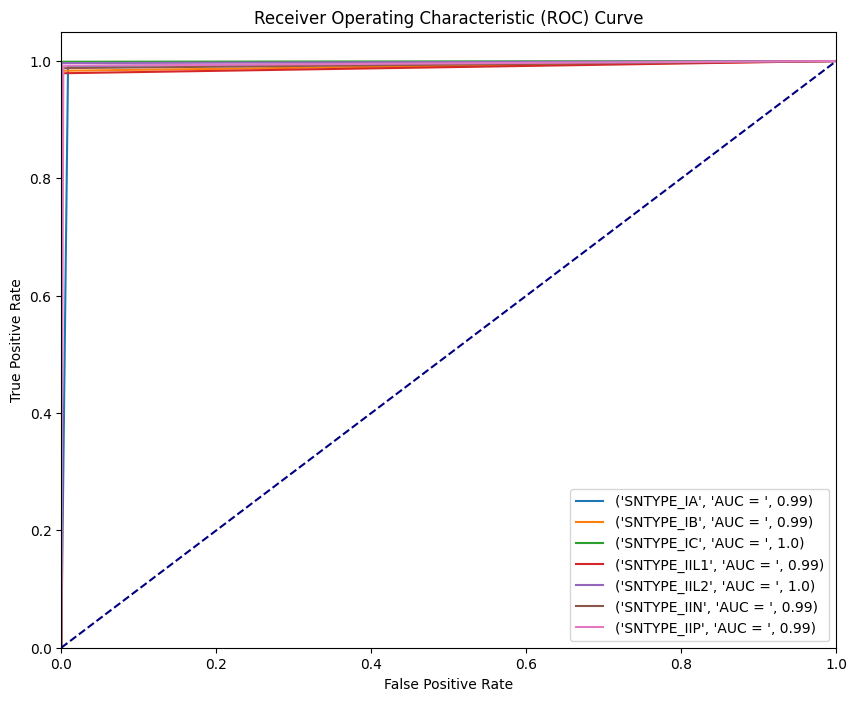

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(y_test1.columns)


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1.values[:, i], Y_RESULT.values[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=(labels[i] ,"AUC = ",roc_auc[i].round(2)))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# HYPERPARAMETER TUNING

In [ ]:
current_params = dclf.get_params()

print("Current hyperparameters:")
for param, value in current_params.items():
    print(f"{param}: {value}")

print("Current Depth::",dclf.get_depth())

Current hyperparameters:
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: None
splitter: best
Current Depth:: 19


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [  17 , 15 ],
    'min_samples_split': [2, 5, 15],
    #  "criterion":["gini","entropy"],
    #  "min_impurity_decrease":[0.000001 , 0.000000000000000000000000000000000000000000000000000000000001]
    "min_impurity_decrease":[1e-160 ,1e-170 , 0.01]
}


np.random.seed(42)
grid_search = GridSearchCV(estimator=dclf, param_grid=param_grid, cv=5  )
grid_search.fit(X_use1, Y_hot)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the model on test data
best_classifier = grid_search.best_estimator_
test_accuracy = cross_val_score(best_classifier , X_use1 , Y_hot , cv=5).mean()
print("Test accuracy:", test_accuracy)


from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, average='micro')
f1_scores = cross_val_score(clf, X_use1 , Y_hot , cv=5, scoring=scorer).mean()


print("F1 scores:", f1_scores)

Best hyperparameters: {'max_depth': 17, 'min_impurity_decrease': 1e-160, 'min_samples_split': 2}
Test accuracy: 0.9931750000000001
F1 scores: 0.9934


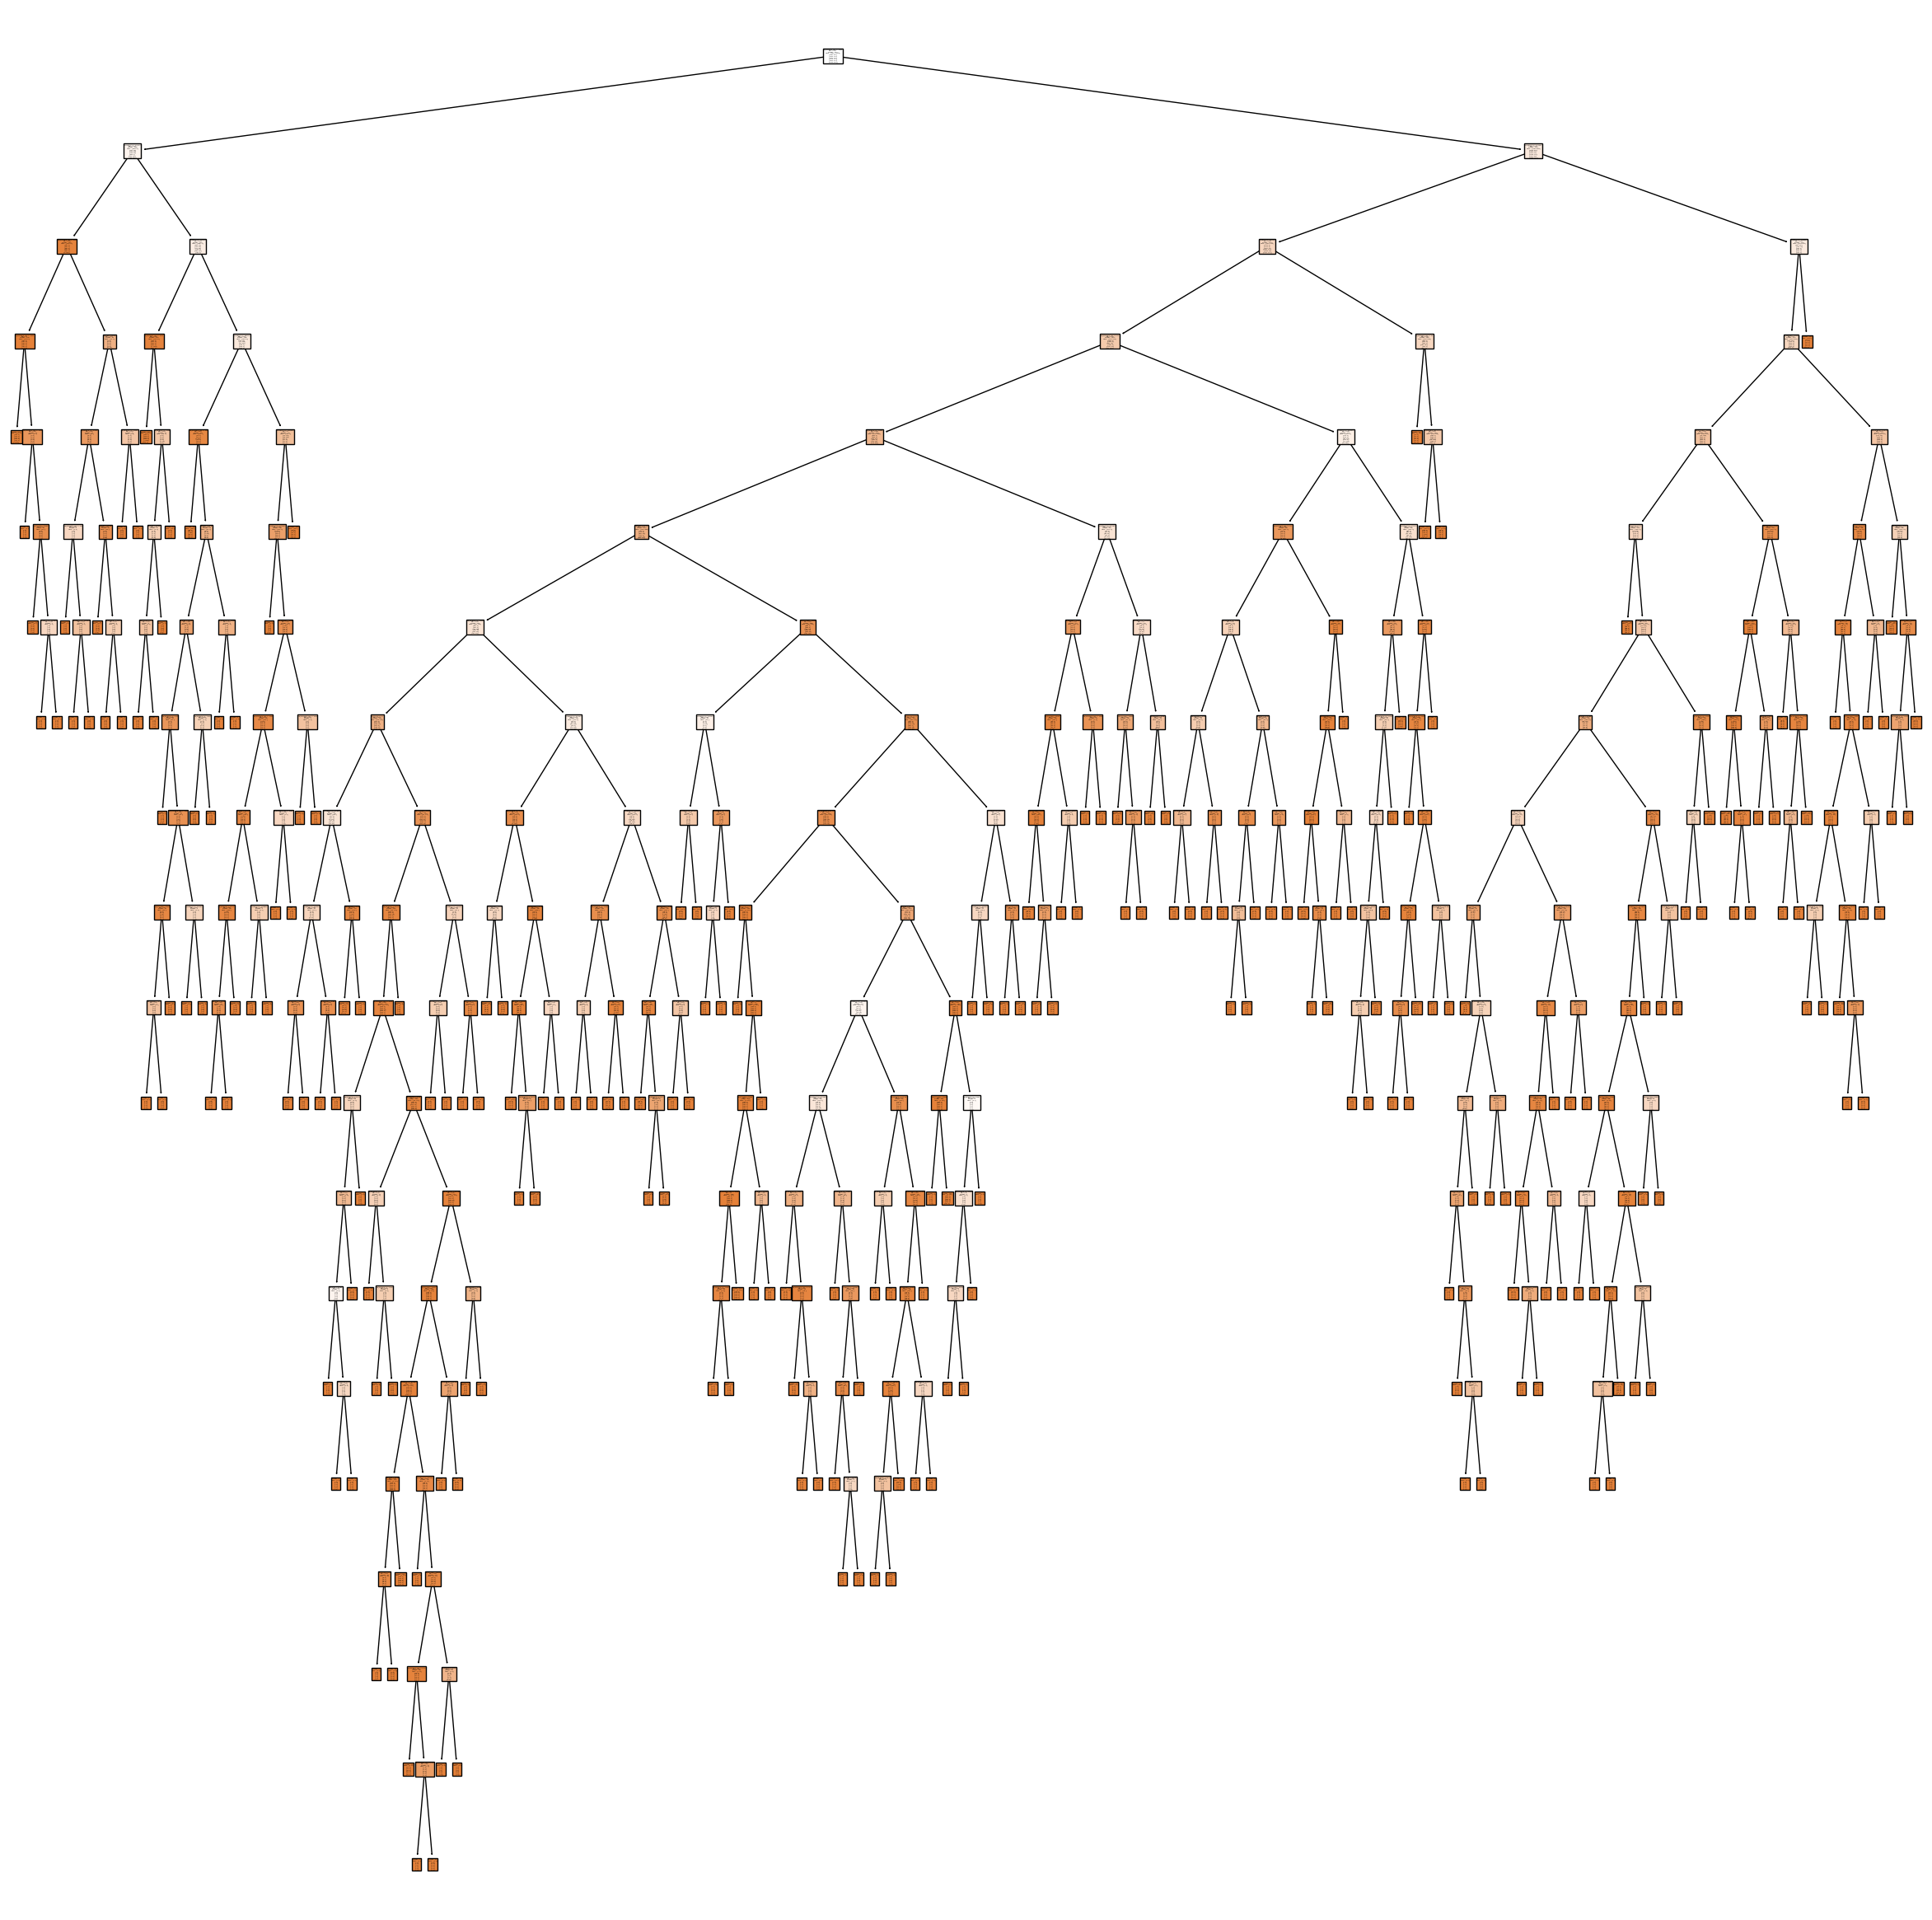

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(30 ,  30))
plot_tree(dclf, filled=True, feature_names=X_use1.columns , class_names=Y_hot.columns )
plt.show()

# 'SIM_REDSHIFT_HOST' v/s 'SIM_REDSHIFT_HELIO'

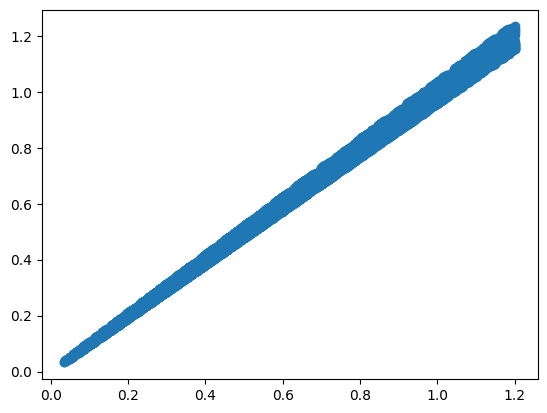

In [ ]:
plt.scatter(X['SIM_REDSHIFT_HELIO'],X['SIM_REDSHIFT_HOST'])
X["SIM_REDSHIFT"]=(X['SIM_REDSHIFT_HELIO']+X['SIM_REDSHIFT_HOST'])/2



# REDSHIFT HELIO V/S REDSHIFT FINAL

<ipython-input-73-78857ddf2ed8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["REDSHIFT_FINAL"],hist=False,kde=True,label="final", color="Red")
<ipython-input-73-78857ddf2ed8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["REDSHIFT_HELIO"],hist=False,kde=True,label=

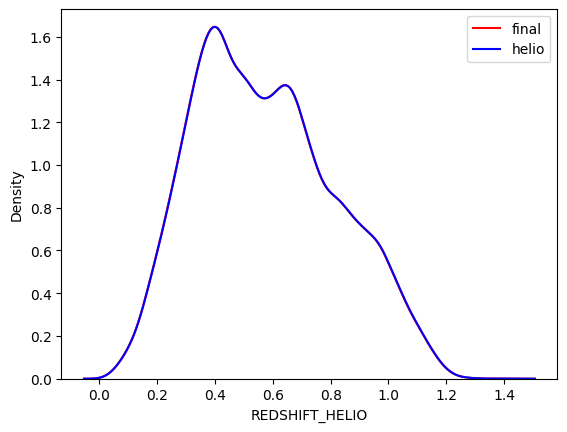

In [ ]:

sns.distplot(df["REDSHIFT_FINAL"],hist=False,kde=True,label="final", color="Red")
sns.distplot(df["REDSHIFT_HELIO"],hist=False,kde=True,label="helio" , color="Blue")
# Add legend
plt.legend()

# Show the plot
plt.show()